<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/DOS_COHP_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COHP and ICOHP plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from io import StringIO

with open('/content/cohp_sac.txt', 'r') as f:
    data = f.readlines()

# remove the first line of data as it contains non-numeric data
data = data[1:]

# split each line by whitespace and store the resulting list in a new list
data = [line.strip().split() for line in data]

# create a DataFrame from the data
df = pd.DataFrame(data)
#df = df.drop(range(0,300))
string_list = df.loc[187:223, 0].tolist()
string_list.insert(0, "energy")
df = df.apply(pd.to_numeric, errors='coerce') # string으로 인식하다가 number로 인식 시작

df = df.drop(range(0,300))
df
df2=df.loc[:,1::2]
df3 = df2.iloc[:, 185:222]
df4 = df.iloc[:,:1].join(df3)
df4.columns=string_list
df4
new_cols = []
for col in df4.columns:
    col = col.replace("(2.2996492795783978)","")
    col = col.replace("No.6:","")
    col = col.replace("97","")
    col = col.replace("89","")
    col = col.replace("->","-")
    new_cols.append(col)
df4.columns = new_cols

columns_to_sum = ['Cl[3s]-Ru[4d_x^2-y^2]','Cl[3p_y]-Ru[4d_x^2-y^2]','Cl[3p_z]-Ru[4d_x^2-y^2]','Cl[3p_x]-Ru[4d_x^2-y^2]']
df4['Cl-Ru[4d_x^2-y^2]'] = pd.concat([df4[col] for col in columns_to_sum], axis=1).sum(axis=1)
columns_to_sum_2 = ['Cl[3s]-Ru[4d_xz]','Cl[3p_y]-Ru[4d_xz]','Cl[3p_z]-Ru[4d_xz]','Cl[3p_x]-Ru[4d_xz]']
df4['Cl-Ru[4d_xz]'] = pd.concat([df4[col] for col in columns_to_sum_2], axis=1).sum(axis=1)
columns_to_sum_3 = ['Cl[3s]-Ru[4d_z^2]','Cl[3p_y]-Ru[4d_z^2]','Cl[3p_z]-Ru[4d_z^2]','Cl[3p_x]-Ru[4d_z^2]']
df4['Cl-Ru[4d_z^2]'] = pd.concat([df4[col] for col in columns_to_sum_3], axis=1).sum(axis=1)
columns_to_sum_4 = ['Cl[3s]-Ru[4d_yz]', 'Cl[3p_y]-Ru[4d_yz]', 'Cl[3p_z]-Ru[4d_yz]','Cl[3p_x]-Ru[4d_yz]']
df4['Cl-Ru[4d_yz]'] = pd.concat([df4[col] for col in columns_to_sum_4], axis=1).sum(axis=1)
columns_to_sum_5 = ['Cl[3s]-Ru[4d_xy]',  'Cl[3p_y]-Ru[4d_xy]', 'Cl[3p_z]-Ru[4d_xy]', 'Cl[3p_x]-Ru[4d_xy]']
df4['Cl-Ru[4d_xy]'] = pd.concat([df4[col] for col in columns_to_sum_5], axis=1).sum(axis=1)


tot = ['Cl-Ru[4d_x^2-y^2]','Cl-Ru[4d_xz]','Cl-Ru[4d_z^2]','Cl-Ru[4d_yz]','Cl-Ru[4d_xy]']
df4['Cl-Ru'] = pd.concat([df4[col] for col in tot], axis=1).sum(axis=1)
df4['Cl-Ru'] = np.negative(df4['Cl-Ru']) # -pCOHP로 바꿔주는 과정

d_list=['Cl-Ru[4d_x^2-y^2]','Cl-Ru[4d_xz]','Cl-Ru[4d_z^2]','Cl-Ru[4d_yz]','Cl-Ru[4d_xy]']
for column in d_list:
    df4[column] = np.negative(df4[column])
df4


,energy,Cl-Ru,Cl[3s]-Ru[5s],Cl[3p_y]-Ru[5s],Cl[3p_z]-Ru[5s],Cl[3p_x]-Ru[5s],Cl[3s]-Ru[4p_y],Cl[3p_y]-Ru[4p_y],Cl[3p_z]-Ru[4p_y],Cl[3p_x]-Ru[4p_y],...,Cl[3p_x]-Ru[4d_xz],Cl[3s]-Ru[4d_x^2-y^2],Cl[3p_y]-Ru[4d_x^2-y^2],Cl[3p_z]-Ru[4d_x^2-y^2],Cl[3p_x]-Ru[4d_x^2-y^2],Cl-Ru[4d_x^2-y^2],Cl-Ru[4d_xz],Cl-Ru[4d_z^2],Cl-Ru[4d_yz],Cl-Ru[4d_xy]
300,-20.23065,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
301,-20.18058,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
302,-20.13050,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
303,-20.08042,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
304,-20.03035,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,8.81335,0.00180,0.08355,0.03948,0.00824,0.00065,0.00938,0.00140,0.00027,0.00004,...,0.00029,-0.00002,-0.00027,-0.00021,-0.00001,0.00051,0.00017,0.00142,0.00181,-0.00211
881,8.86343,0.00184,0.08215,0.03841,0.00770,0.00071,0.00921,0.00160,0.00031,0.00005,...,0.00032,-0.00003,-0.00029,-0.00019,-0.00001,0.00052,0.00015,0.00138,0.00179,-0.00200
882,8.91351,0.00181,0.08171,0.03780,0.00729,0.00080,0.00909,0.00178,0.00034,0.00005,...,0.00036,-0.00004,-0.00032,-0.00017,-0.00001,0.00054,0.00016,0.00143,0.00174,-0.00206
883,8.96358,0.00164,0.08210,0.03759,0.00703,0.00090,0.00899,0.00188,0.00036,0.00004,...,0.00040,-0.00004,-0.00033,-0.00015,-0.00001,0.00053,0.00020,0.00158,0.00164,-0.00231


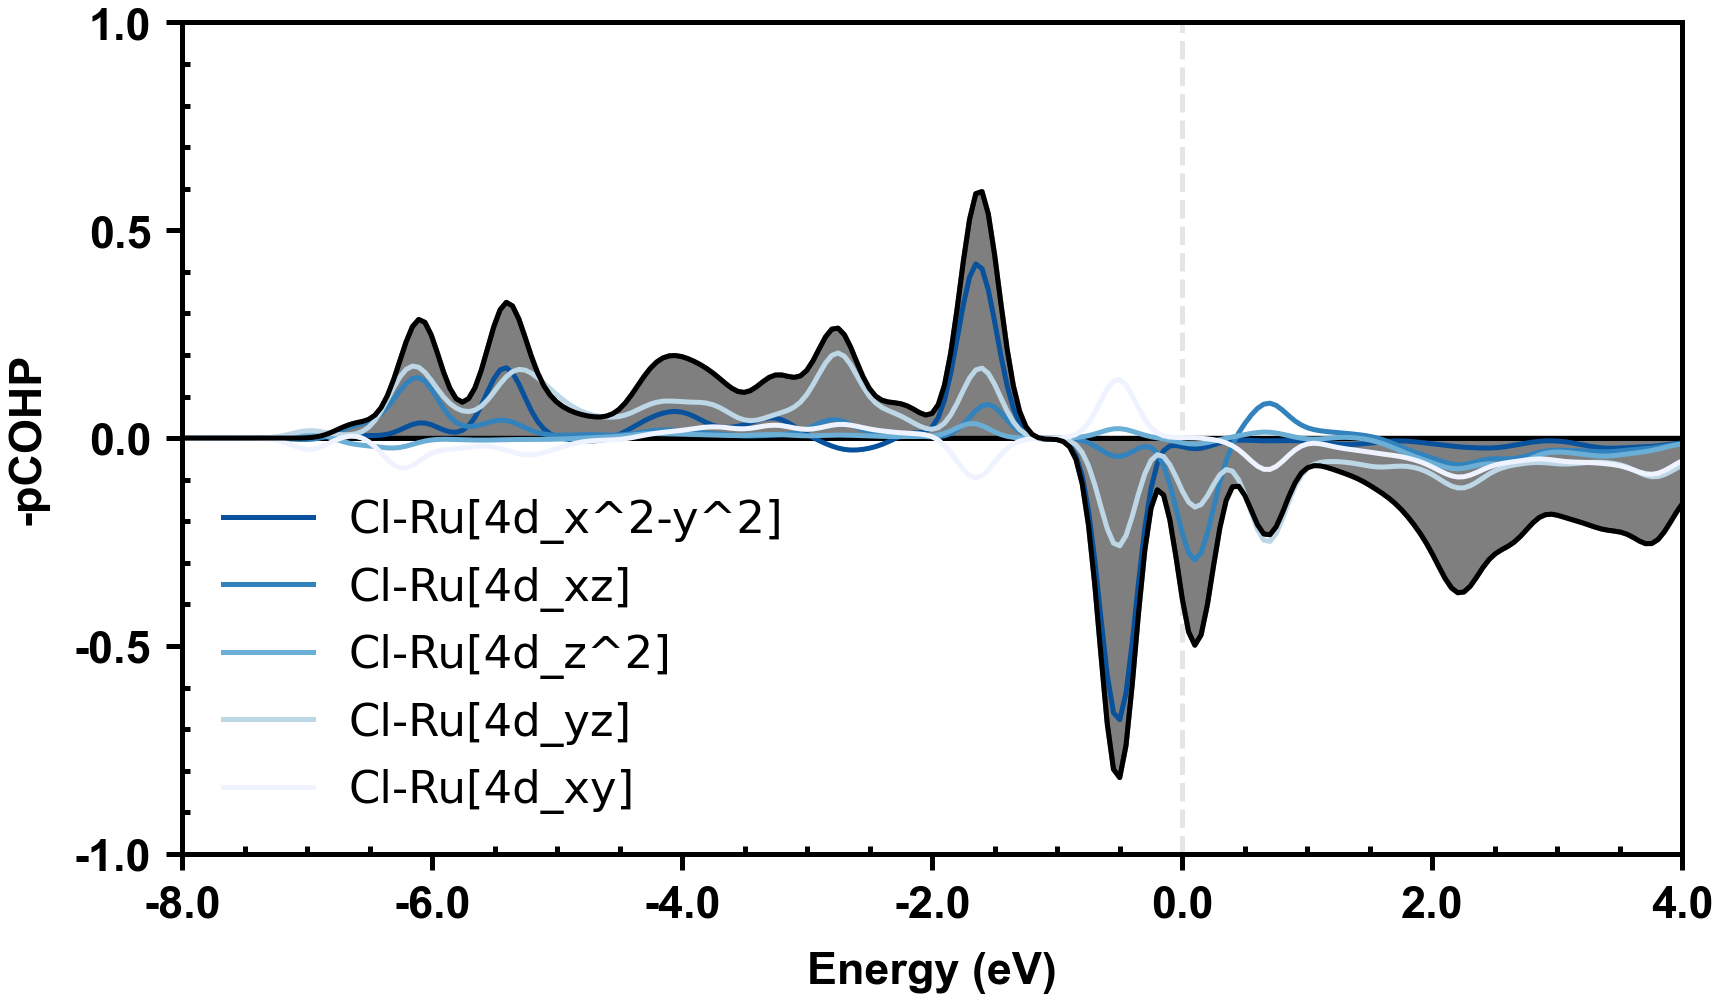

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import RdBu, Reds, Blues, Greens, Greys
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Blues[len(d_list)]
colors2 = Blues[len(d_list)]

# Get all columns that start with '4d'
# Plot energy vs each column
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)
plt.axhline(y=0,c='black', linewidth=thick)
for i, col in enumerate(d_list):
    plt.plot(df4['energy'], df4[col],label=col, color= colors[i], linewidth=thick)
plt.plot(df4['energy'], df4['Cl-Ru'], color='black', linewidth=thick)
plt.fill_between(df4['energy'],0, df4['Cl-Ru'], color='black', linewidth=thick,alpha=0.5)


plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(-5, 5, step=0.5),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-1, 1])


# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('-pCOHP', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('sac_cohp.png',dpi=150)

# COHP RuO2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from io import StringIO

with open('/content/ruo2_cohp.txt', 'r') as f:
    data = f.readlines()

# remove the first line of data as it contains non-numeric data
data = data[1:]

# split each line by whitespace and store the resulting list in a new list
data = [line.strip().split() for line in data]

# create a DataFrame from the data
df = pd.DataFrame(data)
#df = df.drop(range(0,300))
string_list = df.loc[2:38, 0].tolist()
string_list.insert(0, "energy")
df = df.apply(pd.to_numeric, errors='coerce') # string으로 인식하다가 number로 인식 시작

df = df.drop(range(0,39))
df
df2=df.loc[:,1::2]
df3 = df2.iloc[:, 0:37]
df4 = df.iloc[:,:1].join(df3)
df4.columns=string_list
new_cols = []
for col in df4.columns:
    col = col.replace("(2.2823741072510169)","")
    col = col.replace("No.1:","")
    col = col.replace("Ru16","Ru")
    col = col.replace("Cl49","Cl")
    col = col.replace("->","-")
    new_cols.append(col)
df4.columns = new_cols

columns_to_sum = ['Cl[3s]-Ru[4d_x^2-y^2]','Cl[3p_y]-Ru[4d_x^2-y^2]','Cl[3p_z]-Ru[4d_x^2-y^2]','Cl[3p_x]-Ru[4d_x^2-y^2]']
df4['Cl-Ru[4d_x^2-y^2]'] = pd.concat([df4[col] for col in columns_to_sum], axis=1).sum(axis=1)
columns_to_sum_2 = ['Cl[3s]-Ru[4d_xz]','Cl[3p_y]-Ru[4d_xz]','Cl[3p_z]-Ru[4d_xz]','Cl[3p_x]-Ru[4d_xz]']
df4['Cl-Ru[4d_xz]'] = pd.concat([df4[col] for col in columns_to_sum_2], axis=1).sum(axis=1)
columns_to_sum_3 = ['Cl[3s]-Ru[4d_z^2]','Cl[3p_y]-Ru[4d_z^2]','Cl[3p_z]-Ru[4d_z^2]','Cl[3p_x]-Ru[4d_z^2]']
df4['Cl-Ru[4d_z^2]'] = pd.concat([df4[col] for col in columns_to_sum_3], axis=1).sum(axis=1)
columns_to_sum_4 = ['Cl[3s]-Ru[4d_yz]', 'Cl[3p_y]-Ru[4d_yz]', 'Cl[3p_z]-Ru[4d_yz]','Cl[3p_x]-Ru[4d_yz]']
df4['Cl-Ru[4d_yz]'] = pd.concat([df4[col] for col in columns_to_sum_4], axis=1).sum(axis=1)
columns_to_sum_5 = ['Cl[3s]-Ru[4d_xy]',  'Cl[3p_y]-Ru[4d_xy]', 'Cl[3p_z]-Ru[4d_xy]', 'Cl[3p_x]-Ru[4d_xy]']
df4['Cl-Ru[4d_xy]'] = pd.concat([df4[col] for col in columns_to_sum_5], axis=1).sum(axis=1)


tot = ['Cl-Ru[4d_x^2-y^2]','Cl-Ru[4d_xz]','Cl-Ru[4d_z^2]','Cl-Ru[4d_yz]','Cl-Ru[4d_xy]']
df4['Cl-Ru'] = pd.concat([df4[col] for col in tot], axis=1).sum(axis=1)
df4['Cl-Ru'] = np.negative(df4['Cl-Ru']) # -pCOHP로 바꿔주는 과정

d_list=['Cl-Ru[4d_x^2-y^2]','Cl-Ru[4d_xz]','Cl-Ru[4d_z^2]','Cl-Ru[4d_yz]','Cl-Ru[4d_xy]']
for column in d_list:
    df4[column] = np.negative(df4[column])
df4


,energy,Cl-Ru,Cl[3s]-Ru[5s],Cl[3p_y]-Ru[5s],Cl[3p_z]-Ru[5s],Cl[3p_x]-Ru[5s],Cl[3s]-Ru[4p_y],Cl[3p_y]-Ru[4p_y],Cl[3p_z]-Ru[4p_y],Cl[3p_x]-Ru[4p_y],...,Cl[3p_x]-Ru[4d_xz],Cl[3s]-Ru[4d_x^2-y^2],Cl[3p_y]-Ru[4d_x^2-y^2],Cl[3p_z]-Ru[4d_x^2-y^2],Cl[3p_x]-Ru[4d_x^2-y^2],Cl-Ru[4d_x^2-y^2],Cl-Ru[4d_xz],Cl-Ru[4d_z^2],Cl-Ru[4d_yz],Cl-Ru[4d_xy]
39,-10.02506,-0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,-0.00000,-0.0,-0.00000,-0.00000,-0.00000
40,-9.97494,-0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,-0.00000,-0.0,-0.00000,-0.00000,-0.00000
41,-9.92481,-0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,-0.00000,-0.0,-0.00000,-0.00000,-0.00000
42,-9.87469,-0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,-0.00000,-0.0,-0.00000,-0.00000,-0.00000
43,-9.82456,-0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,-0.00000,-0.0,-0.00000,-0.00000,-0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,9.82456,-0.00245,0.20251,0.15471,-0.0,0.03635,0.0,0.0,0.00935,0.0,...,-0.0,0.00000,0.00007,-0.0,-0.00011,0.00004,-0.0,0.00164,-0.00035,-0.00378
436,9.87469,-0.00223,0.20379,0.15590,-0.0,0.03593,0.0,0.0,0.00964,0.0,...,-0.0,0.00003,0.00007,-0.0,-0.00011,0.00001,-0.0,0.00254,-0.00036,-0.00442
437,9.92481,-0.00228,0.20123,0.15487,-0.0,0.03468,0.0,0.0,0.00959,0.0,...,-0.0,0.00008,0.00007,-0.0,-0.00010,-0.00005,-0.0,0.00314,-0.00034,-0.00503
438,9.97494,-0.00258,0.19347,0.15022,-0.0,0.03245,0.0,0.0,0.00930,0.0,...,-0.0,0.00013,0.00006,-0.0,-0.00010,-0.00009,-0.0,0.00332,-0.00031,-0.00550


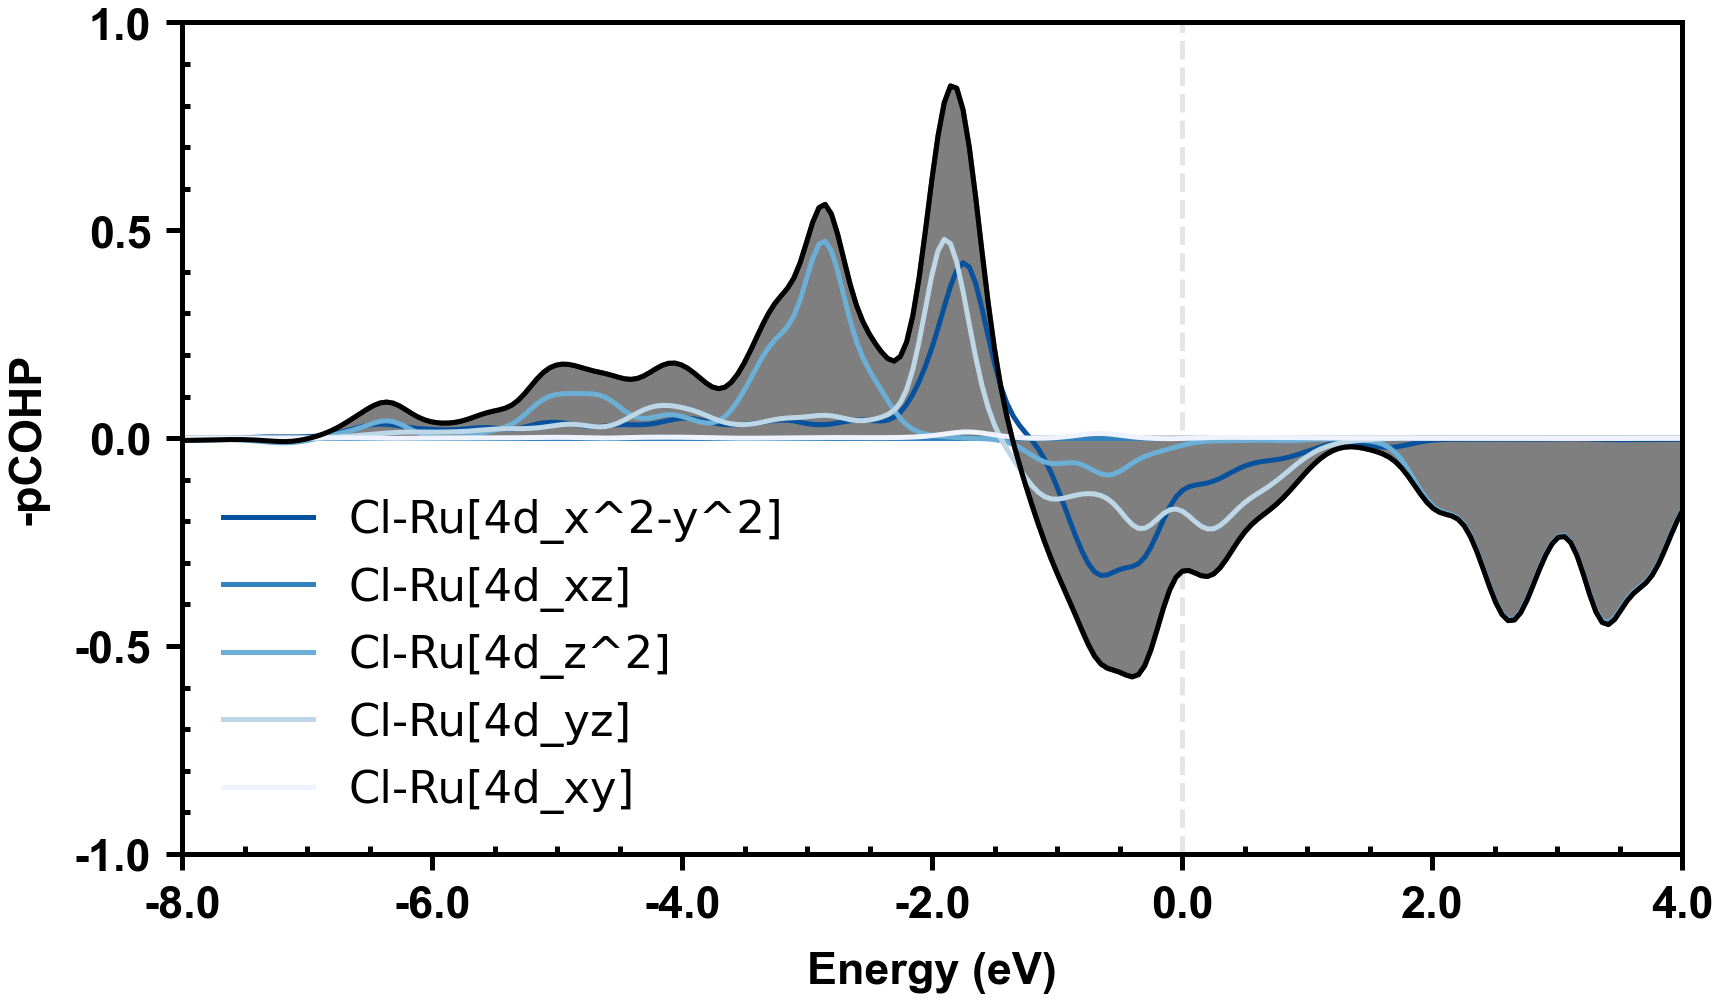

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import RdBu, Reds, Blues, Greens, Greys
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Blues[len(d_list)]
colors2 = Blues[len(d_list)]

# Get all columns that start with '4d'
# Plot energy vs each column
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)
plt.axhline(y=0,c='black', linewidth=thick)
for i, col in enumerate(d_list):
    plt.plot(df4['energy'], df4[col],label=col, color= colors[i], linewidth=thick)
plt.plot(df4['energy'], df4['Cl-Ru'], color='black', linewidth=thick)
plt.fill_between(df4['energy'],0, df4['Cl-Ru'], color='black', linewidth=thick,alpha=0.5)


plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(-5, 5, step=0.5),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-1, 1])


# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('-pCOHP', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('ruo2_cohp.png',dpi=150)

# DOS of Ru SAC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from io import StringIO

with open('/content/dosplot.txt', 'r') as f:
    data = f.readlines()

# remove the first line of data as it contains non-numeric data
data = data[1:]

# split each line by whitespace and store the resulting list in a new list
data = [line.strip().split() for line in data]

# create a DataFrame from the data
df = pd.DataFrame(data)
df = df.drop(range(0,4))

df
result = df[df.eq('17;').any(1)]
indices = result.index

row_number = df.index.get_loc(indices[0])

print(row_number)
new2_df = df.iloc[64215:64214+662]
new2_df.columns = ["energy","3s_up", "3s_dw", "3p_y_up", "3p_y_dw", "3p_z_up", "3p_z_dw", "3p_x_up", "3p_x_dw","dum","dum","dum","dum","dum","dum","dum","dum","dum","dum"]
new2_df = new2_df.apply(pd.to_numeric, errors='coerce')
columns_to_average2 = ['3s','3p_y','3p_z','3p_x'] 
for col in columns_to_average2:
    new2_df[col] = pd.concat([new2_df[col+'_up'], new2_df[col+'_dw']], axis=1).mean(axis=1)

new2_df['Cl 3p'] = pd.concat([new2_df['3p_y'], new2_df['3p_z'],new2_df['3p_x']], axis=1).sum(axis=1)
new2_df

64214


,energy,3s_up,3s_dw,3p_y_up,3p_y_dw,3p_z_up,3p_z_dw,3p_x_up,3p_x_dw,dum,...,dum,dum,dum,dum,dum,3s,3p_y,3p_z,3p_x,Cl 3p
64219,-24.03642,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
64220,-23.98634,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
64221,-23.93627,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
64222,-23.88619,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
64223,-23.83612,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64875,8.81335,0.00100,0.00102,0.00155,0.00168,0.00095,0.00091,0.00156,0.00148,NaN,...,NaN,NaN,NaN,NaN,NaN,0.001010,0.001615,0.000930,0.001520,0.004065
64876,8.86343,0.00098,0.00100,0.00145,0.00159,0.00103,0.00099,0.00157,0.00149,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000990,0.001520,0.001010,0.001530,0.004060
64877,8.91351,0.00097,0.00098,0.00139,0.00150,0.00108,0.00106,0.00160,0.00153,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000975,0.001445,0.001070,0.001565,0.004080
64878,8.96358,0.00097,0.00097,0.00136,0.00144,0.00110,0.00110,0.00161,0.00159,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000970,0.001400,0.001100,0.001600,0.004100


In [ ]:
new_df = df.iloc[58919:58918+662]
new_df.columns = ['energy','5s_up', '5s_dw', '4p_y_up', '4p_y_dw', '4p_z_up', '4p_z_dw', '4p_x_up', '4p_x_dw', '4d_xy_up', '4d_xy_dw','4d_yz_up','4d_yz_dw','4d_z^2_up','4d_z^2_dw','4d_xz_up','4d_xz_dw','4d_x^2-y^2_up','4d_x^2-y^2_dw']

new_df = new_df.apply(pd.to_numeric, errors='coerce')

columns_to_average = ['4p_y', '4p_z', '4p_x', '4d_xy', '4d_yz', '4d_z^2', '4d_xz', '4d_x^2-y^2']
for col in columns_to_average:
    new_df[col] = pd.concat([new_df[col+'_up'], new_df[col+'_dw']], axis=1).mean(axis=1)
new_df['Ru 4d'] = pd.concat([new_df['4d_xy'], new_df['4d_yz'],new_df['4d_z^2'],new_df['4d_xz'],new_df['4d_x^2-y^2']], axis=1).sum(axis=1)
new_df['Ru 4p'] = pd.concat([new_df['4p_y'], new_df['4p_z'],new_df['4p_x']], axis=1).sum(axis=1)
new_df['Ru 5s'] = pd.concat([new_df['5s_up'], new_df['5s_dw']], axis=1).mean(axis=1)

new_df


,energy,5s_up,5s_dw,4p_y_up,4p_y_dw,4p_z_up,4p_z_dw,4p_x_up,4p_x_dw,4d_xy_up,...,4p_z,4p_x,4d_xy,4d_yz,4d_z^2,4d_xz,4d_x^2-y^2,Ru 4d,Ru 4p,Ru 5s
58923,-24.03642,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58924,-23.98634,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58925,-23.93627,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58926,-23.88619,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58927,-23.83612,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59579,8.81335,0.07379,0.07705,0.11843,0.09776,0.19775,0.18034,0.13204,0.13677,0.00218,...,0.189045,0.134405,0.002185,0.001395,0.002555,0.001650,0.001465,0.009250,0.431545,0.075420
59580,8.86343,0.07220,0.07618,0.12832,0.10796,0.19898,0.18502,0.13253,0.13873,0.00209,...,0.192000,0.135630,0.002060,0.001345,0.002585,0.001815,0.001575,0.009380,0.445770,0.074190
59581,8.91351,0.07170,0.07557,0.13731,0.11871,0.19799,0.18854,0.13627,0.14050,0.00204,...,0.193265,0.138385,0.001980,0.001325,0.002645,0.001985,0.001690,0.009625,0.459660,0.073635
59582,8.96358,0.07222,0.07506,0.14500,0.12907,0.19499,0.19005,0.14322,0.14269,0.00201,...,0.192520,0.142955,0.001940,0.001325,0.002735,0.002135,0.001790,0.009925,0.472510,0.073640


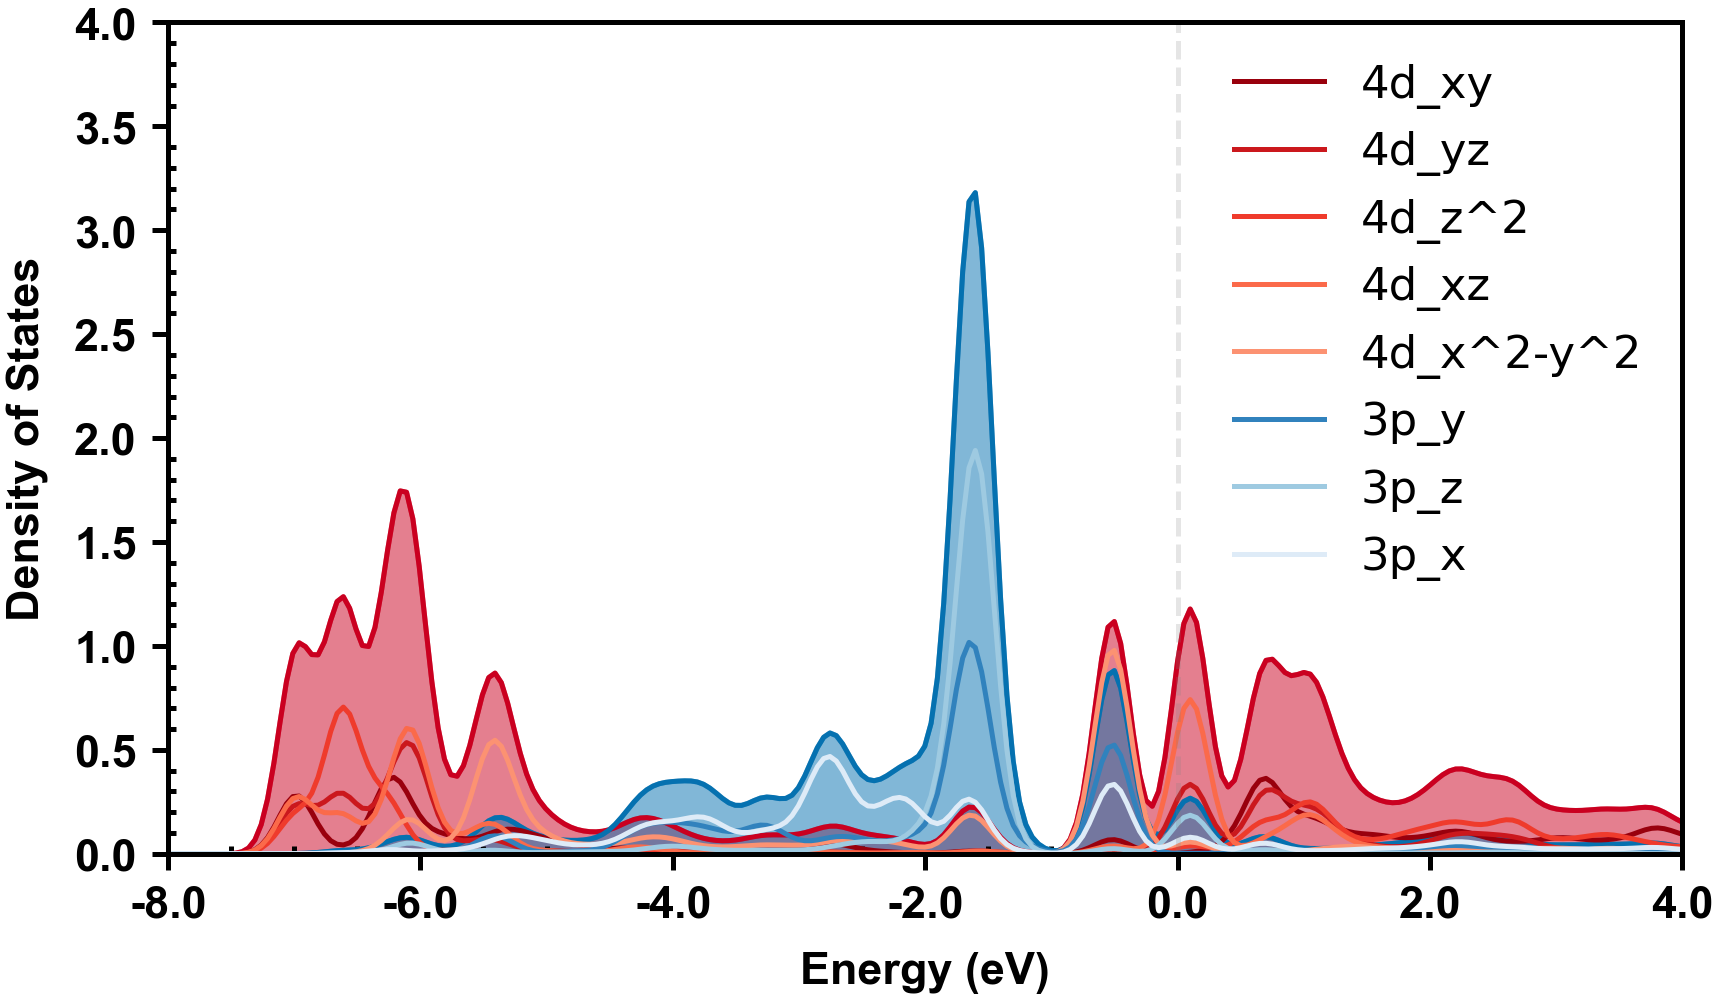

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import RdBu, Reds, Blues, Greens
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Reds[len(columns_to_average)]
colors2 = Blues[len(columns_to_average2)]

# Get all columns that start with '4d'
hi = ['Ru 5s','Ru 4p']
four_d_columns = ['4d_xy', '4d_yz', '4d_z^2', '4d_xz', '4d_x^2-y^2']
columns_to_average2 = ['3p_y','3p_z','3p_x'] 



# total을 그리는 과정

plt.plot(new_df['energy'], new_df['Ru 4d'], color= red, linewidth=thick)
plt.fill_between(new_df['energy'],0, new_df['Ru 4d'], color=red, linewidth=thick,alpha=0.5)

plt.plot(new2_df['energy'], new2_df['Cl 3p'], color= blue, linewidth=thick)
plt.fill_between(new2_df['energy'],0, new2_df['Cl 3p'], color=blue, linewidth=thick,alpha=0.5)

# Plot energy vs each column

for i, col in enumerate(four_d_columns):
    plt.plot(new_df['energy'], new_df[col],label=col, color= colors[i], linewidth=thick)
for i, col in enumerate(columns_to_average2):
    plt.plot(new2_df['energy'], new2_df[col],label=col, color= colors2[i], linewidth=thick)


plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(0, 5, step=0.5),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-0, 4.0])
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('Density of States', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('1.png',dpi=150)

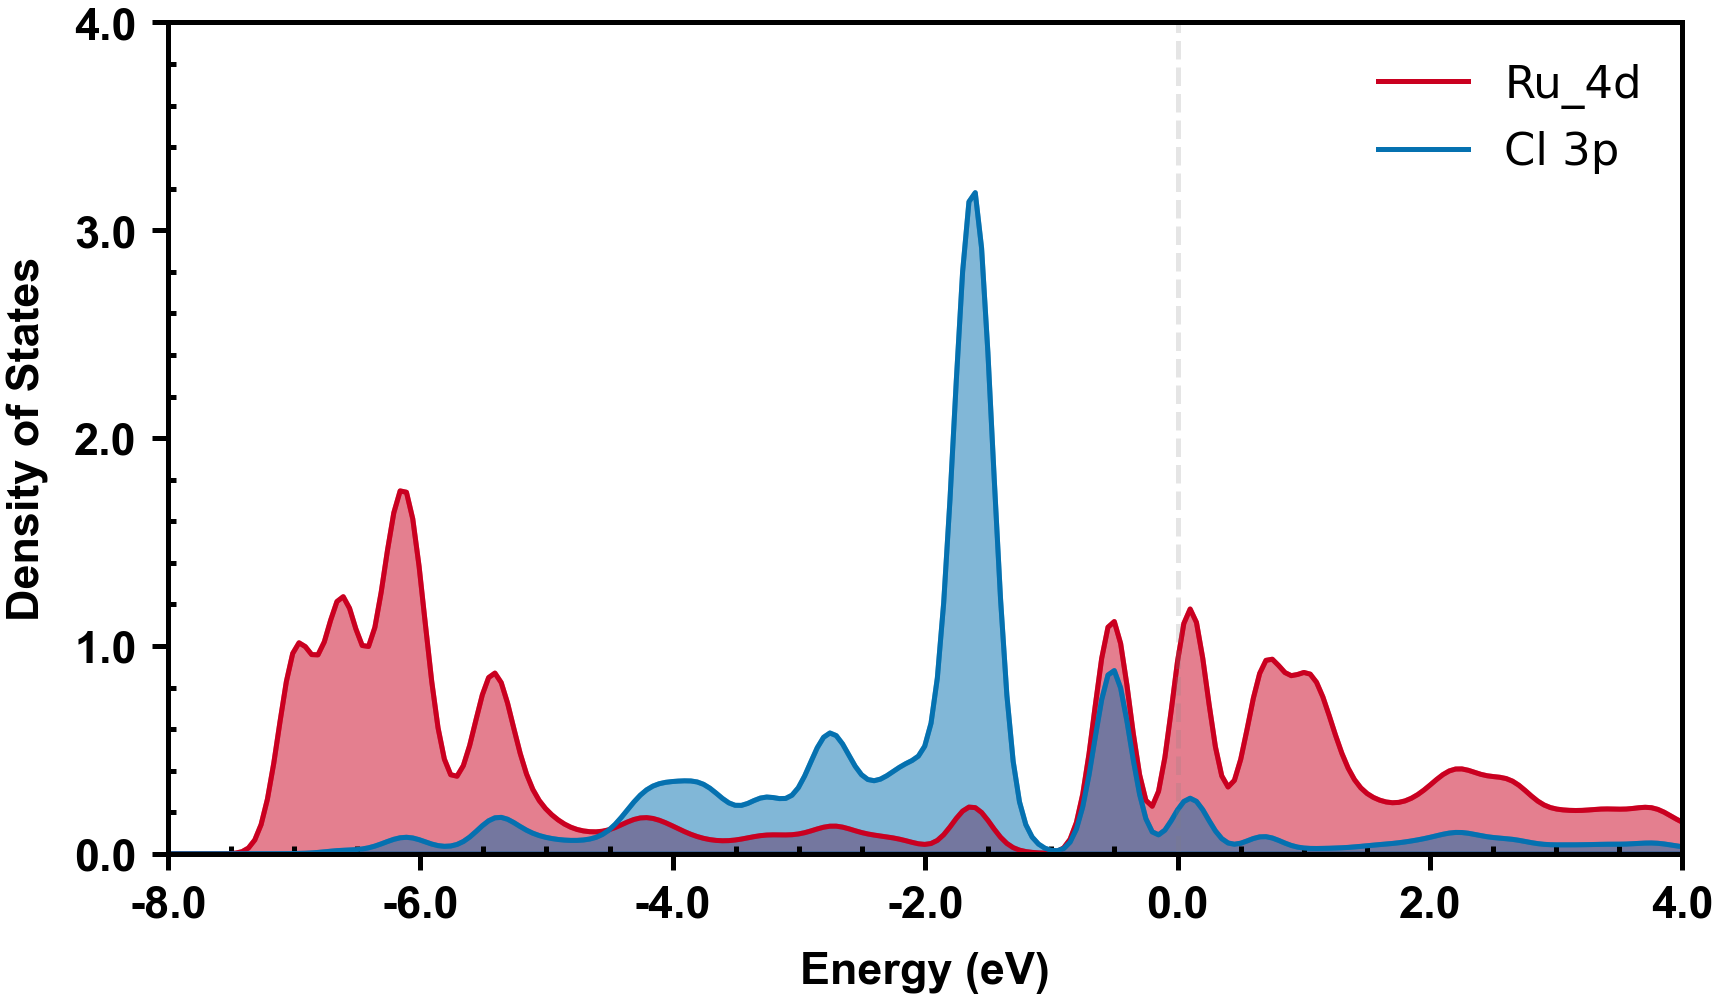

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Reds, Blues
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Reds[len(columns_to_average)]
colors2 = Blues[len(columns_to_average2)]


# Plot energy vs each column
plt.plot(new_df['energy'], new_df['Ru 4d'],label='Ru_4d', color= red, linewidth=thick)
plt.fill_between(new_df['energy'],0, new_df['Ru 4d'], color= red,linewidth=thick,alpha=0.5)
plt.plot(new2_df['energy'], new2_df['Cl 3p'],label='Cl 3p', color= blue, linewidth=thick)
plt.fill_between(new2_df['energy'],0,new2_df['Cl 3p'],color=blue,linewidth=thick,alpha=0.5)


plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(0, 5, step=1),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-0, 4.0])
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('Density of States', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('2.png',dpi=150)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from io import StringIO

with open('/content/dsa.txt', 'r') as f:
    data = f.readlines()

# remove the first line of data as it contains non-numeric data
data = data[1:]

# split each line by whitespace and store the resulting list in a new list
data = [line.strip().split() for line in data]

# create a DataFrame from the data
df = pd.DataFrame(data)
df = df.drop(range(0,4))

df
result = df[df.eq('17;').any(1)]
indices = result.index

row_number = df.index.get_loc(indices[0])

new3_df = df.iloc[row_number+1:row_number+403]
new3_df.columns = ["energy","3s_up", "3s_dw", "3p_y_up", "3p_y_dw", "3p_z_up", "3p_z_dw", "3p_x_up", "3p_x_dw","dum","dum","dum","dum","dum","dum","dum","dum","dum","dum"]
new3_df = new3_df.apply(pd.to_numeric, errors='coerce')
columns_to_average2 = ['3s','3p_y','3p_z','3p_x'] 
for col in columns_to_average2:
    new3_df[col] = pd.concat([new3_df[col+'_up'], new3_df[col+'_dw']], axis=1).mean(axis=1)

new3_df['Cl 3p'] = pd.concat([new3_df['3p_y'], new3_df['3p_z'],new3_df['3p_x']], axis=1).sum(axis=1)
new3_df

,energy,3s_up,3s_dw,3p_y_up,3p_y_dw,3p_z_up,3p_z_dw,3p_x_up,3p_x_dw,dum,...,dum,dum,dum,dum,dum,3s,3p_y,3p_z,3p_x,Cl 3p
10055,-10.02506,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
10056,-9.97494,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
10057,-9.92481,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
10058,-9.87469,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
10059,-9.82456,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10451,9.82456,0.00254,0.00240,0.00077,0.00075,0.00358,0.00332,0.00036,0.00042,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002470,0.000760,0.003450,0.000390,0.004600
10452,9.87469,0.00273,0.00257,0.00075,0.00075,0.00389,0.00364,0.00040,0.00043,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002650,0.000750,0.003765,0.000415,0.004930
10453,9.92481,0.00288,0.00271,0.00075,0.00077,0.00411,0.00391,0.00044,0.00046,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002795,0.000760,0.004010,0.000450,0.005220
10454,9.97494,0.00298,0.00282,0.00080,0.00081,0.00426,0.00411,0.00047,0.00048,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002900,0.000805,0.004185,0.000475,0.005465


In [ ]:
result = df[df.eq('22;').any(1)]
indices = result.index

row_number = df.index.get_loc(indices[1])
print(row_number)

data = df.iloc[row_number+1:row_number+403]
data.columns = ['energy','5s_up', '5s_dw', '4p_y_up', '4p_y_dw', '4p_z_up', '4p_z_dw', '4p_x_up', '4p_x_dw', '4d_xy_up', '4d_xy_dw','4d_yz_up','4d_yz_dw','4d_z^2_up','4d_z^2_dw','4d_xz_up','4d_xz_dw','4d_x^2-y^2_up','4d_x^2-y^2_dw']

data = data.apply(pd.to_numeric, errors='coerce')

columns_to_average = ['4p_y', '4p_z', '4p_x', '4d_xy', '4d_yz', '4d_z^2', '4d_xz', '4d_x^2-y^2']
for col in columns_to_average:
    data[col] = pd.concat([data[col+'_up'], data[col+'_dw']], axis=1).mean(axis=1)
data['Ru 4d'] = pd.concat([data['4d_xy'], data['4d_yz'],data['4d_z^2'],data['4d_xz'],data['4d_x^2-y^2']], axis=1).sum(axis=1)
new4_df=data
new4_df


1608


,energy,5s_up,5s_dw,4p_y_up,4p_y_dw,4p_z_up,4p_z_dw,4p_x_up,4p_x_dw,4d_xy_up,...,4d_x^2-y^2_dw,4p_y,4p_z,4p_x,4d_xy,4d_yz,4d_z^2,4d_xz,4d_x^2-y^2,Ru 4d
1613,-10.025060,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1614,-9.974940,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1615,-9.924810,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1616,-9.874690,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1617,-9.824560,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,9.874690,0.366980,0.34555,0.126020,0.10261,0.04690,0.04767,0.03935,0.03650,0.00128,...,0.00011,0.114315,0.047285,0.037925,0.001180,0.001095,0.006030,0.001000,0.000125,0.009430
2011,9.924810,0.383370,0.36421,0.133560,0.10727,0.04795,0.04582,0.04585,0.03724,0.00130,...,0.00012,0.120415,0.046885,0.041545,0.001190,0.001055,0.006180,0.001120,0.000140,0.009685
2012,9.974940,0.392080,0.37261,0.140860,0.11198,0.05236,0.04601,0.05468,0.03986,0.00137,...,0.00014,0.126420,0.049185,0.047270,0.001245,0.001020,0.006215,0.001195,0.000165,0.009840
2013,10.025060,0.397820,0.37578,0.146230,0.11881,0.06070,0.04956,0.06488,0.04494,0.00149,...,0.00017,0.132520,0.055130,0.054910,0.001350,0.001010,0.006210,0.001240,0.000195,0.010005


In [ ]:
data['esum']= data['Ru 4d']*0.05*data['energy']
data['sum']=(data['Ru 4d']*0.05)
Total=data['esum'].sum()/data['sum'].sum()
print(Total)

1.4960011984462802


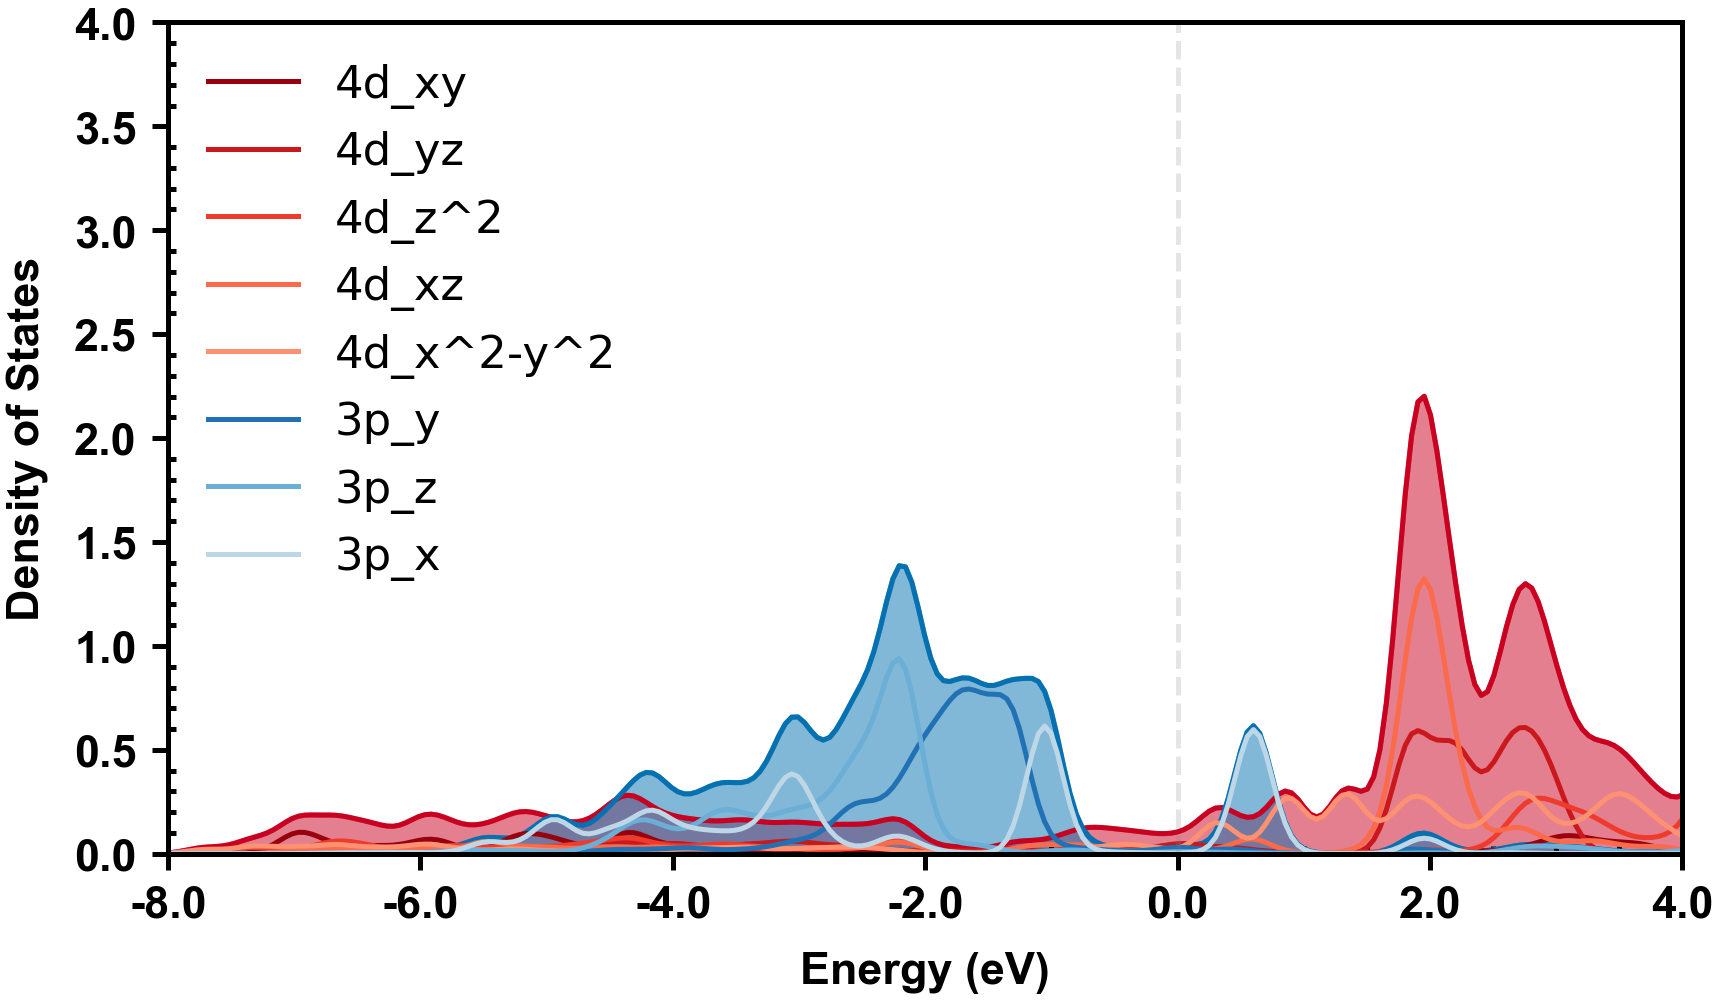

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import RdBu, Reds, Blues, Greens
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Reds[len(columns_to_average)]
colors2 = Blues[len(columns_to_average2)]

# Get all columns that start with '4d'
hi = ['Ru 5s','Ru 4p']
four_d_columns = ['4d_xy', '4d_yz', '4d_z^2', '4d_xz', '4d_x^2-y^2']
columns_to_average2 = ['3p_y','3p_z','3p_x'] 



# total을 그리는 과정

plt.plot(new4_df['energy'], new4_df['Ru 4d'], color= red, linewidth=thick)
plt.fill_between(new4_df['energy'],0, new4_df['Ru 4d'], color=red, linewidth=thick,alpha=0.5)

plt.plot(new3_df['energy'], new3_df['Cl 3p'], color= blue, linewidth=thick)
plt.fill_between(new3_df['energy'],0, new3_df['Cl 3p'], color=blue, linewidth=thick,alpha=0.5)

# Plot energy vs each column

for i, col in enumerate(four_d_columns):
    plt.plot(new4_df['energy'], new4_df[col],label=col, color= colors[i], linewidth=thick)
for i, col in enumerate(columns_to_average2):
    plt.plot(new3_df['energy'], new3_df[col],label=col, color= colors2[i], linewidth=thick)


plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(0, 5, step=0.5),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-0, 4.0])
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('Density of States', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('1.png',dpi=150)

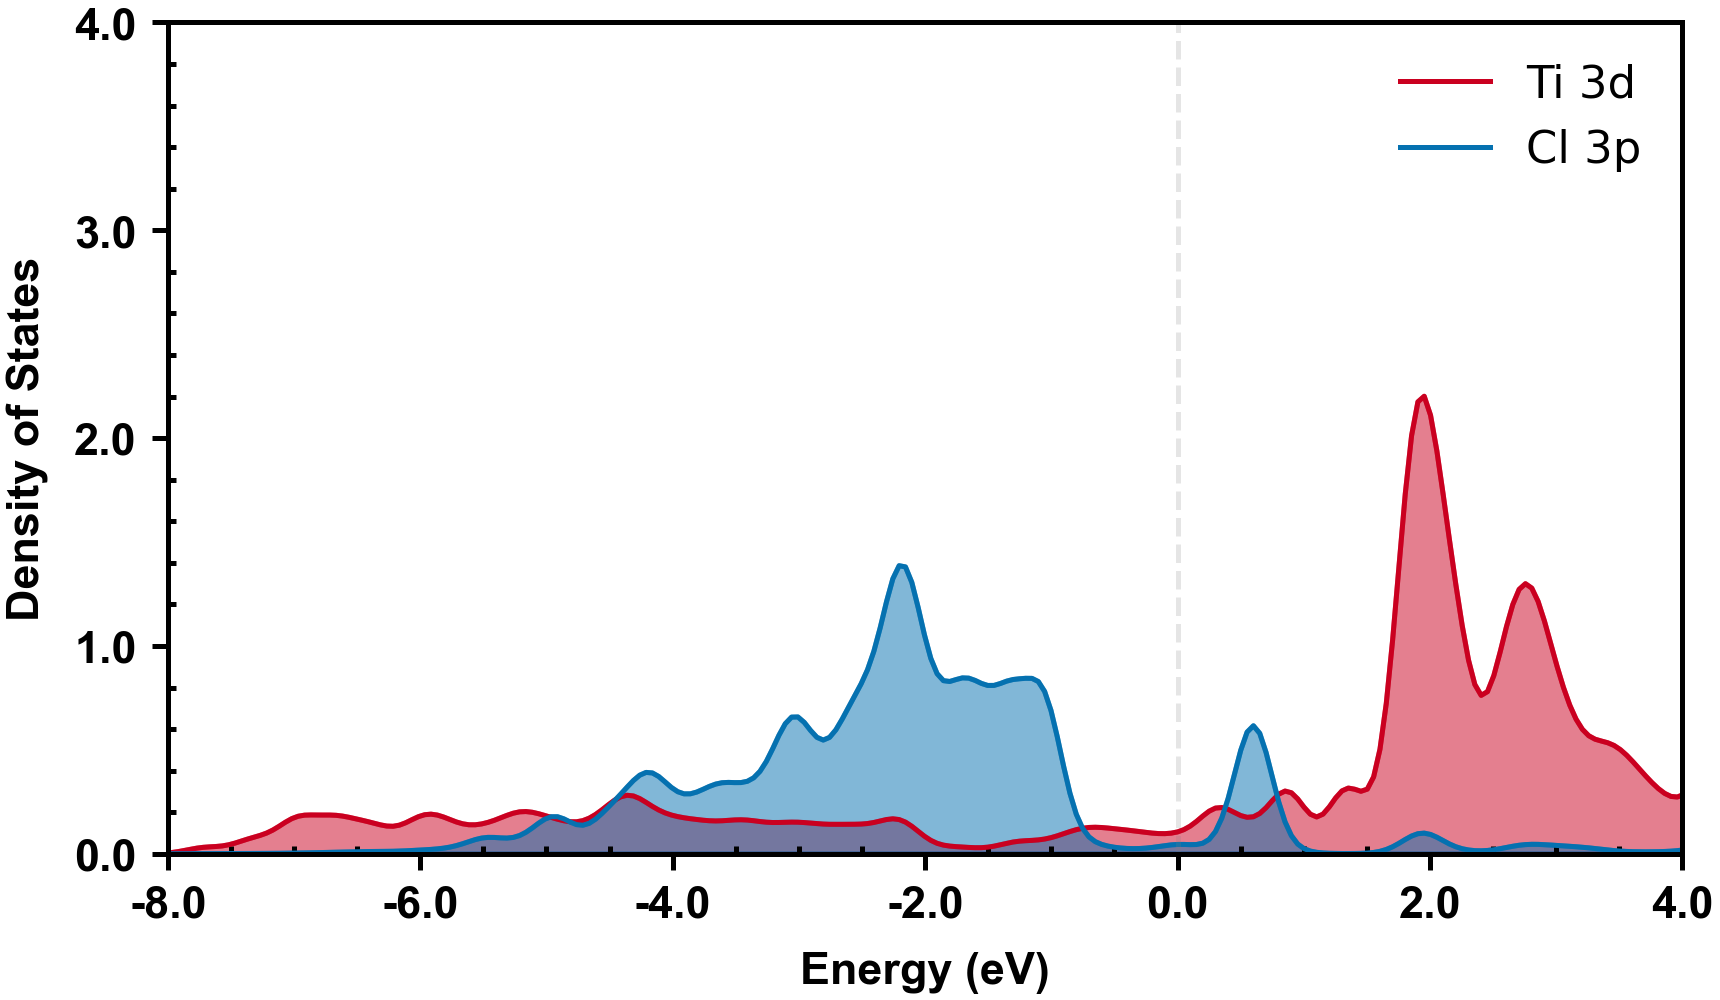

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Reds, Blues
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Reds[len(columns_to_average)]
colors2 = Blues[len(columns_to_average2)]


# Plot energy vs each column
plt.plot(new4_df['energy'], new4_df['Ru 4d'],label='Ti 3d', color= red, linewidth=thick)
plt.fill_between(new4_df['energy'],0, new4_df['Ru 4d'], color= red,linewidth=thick,alpha=0.5)
plt.plot(new3_df['energy'], new3_df['Cl 3p'],label='Cl 3p', color= blue, linewidth=thick)
plt.fill_between(new3_df['energy'],0,new3_df['Cl 3p'],color=blue,linewidth=thick,alpha=0.5)


plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(0, 5, step=1),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-0, 4.0])
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('Density of States', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('4.png',dpi=150)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from io import StringIO

with open('/content/ruo2.txt', 'r') as f:
    data = f.readlines()

# remove the first line of data as it contains non-numeric data
data = data[1:]

# split each line by whitespace and store the resulting list in a new list
data = [line.strip().split() for line in data]

# create a DataFrame from the data
df = pd.DataFrame(data)
df = df.drop(range(0,4))

df
result = df[df.eq('17;').any(1)]
indices = result.index

row_number = df.index.get_loc(indices[0])

data = df.iloc[row_number+1:row_number+402]
data.columns = ["energy","3s_up", "3s_dw", "3p_y_up", "3p_y_dw", "3p_z_up", "3p_z_dw", "3p_x_up", "3p_x_dw","dum","dum","dum","dum","dum","dum","dum","dum","dum","dum"]
data = data.apply(pd.to_numeric, errors='coerce')
columns_to_average2 = ['3s','3p_y','3p_z','3p_x'] 
for col in columns_to_average2:
    data[col] = pd.concat([data[col+'_up'], data[col+'_dw']], axis=1).mean(axis=1)

data['Cl 3p'] = pd.concat([data['3p_y'], data['3p_z'],data['3p_x']], axis=1).sum(axis=1)


new5_df =data
new5_df



,energy,3s_up,3s_dw,3p_y_up,3p_y_dw,3p_z_up,3p_z_dw,3p_x_up,3p_x_dw,dum,...,dum,dum,dum,dum,dum,3s,3p_y,3p_z,3p_x,Cl 3p
19703,-10.02506,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000
19704,-9.97494,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000
19705,-9.92481,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000
19706,-9.87469,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000
19707,-9.82456,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20099,9.82456,0.00398,0.00395,0.00184,0.00200,0.00195,0.00195,0.00129,0.00119,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003965,0.001920,0.001950,0.001240,0.00511
20100,9.87469,0.00402,0.00396,0.00183,0.00191,0.00196,0.00187,0.00155,0.00146,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003990,0.001870,0.001915,0.001505,0.00529
20101,9.92481,0.00398,0.00393,0.00174,0.00177,0.00189,0.00175,0.00180,0.00175,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003955,0.001755,0.001820,0.001775,0.00535
20102,9.97494,0.00384,0.00385,0.00162,0.00161,0.00176,0.00161,0.00197,0.00197,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003845,0.001615,0.001685,0.001970,0.00527


In [ ]:
result = df[df.eq('44;').any(1)]
indices = result.index

row_number = df.index.get_loc(indices[15])
print(row_number)

data = df.iloc[row_number+1:row_number+402]

data.columns = ['energy','5s_up', '5s_dw', '4p_y_up', '4p_y_dw', '4p_z_up', '4p_z_dw', '4p_x_up', '4p_x_dw', '4d_xy_up', '4d_xy_dw','4d_yz_up','4d_yz_dw','4d_z^2_up','4d_z^2_dw','4d_xz_up','4d_xz_dw','4d_x^2-y^2_up','4d_x^2-y^2_dw']

data = data.apply(pd.to_numeric, errors='coerce')

columns_to_average = ['4p_y', '4p_z', '4p_x', '4d_xy', '4d_yz', '4d_z^2', '4d_xz', '4d_x^2-y^2']
for col in columns_to_average:
    data[col] = pd.concat([data[col+'_up'], data[col+'_dw']], axis=1).mean(axis=1)
data['Ru 4d'] = pd.concat([data['4d_xy'], data['4d_yz'],data['4d_z^2'],data['4d_xz'],data['4d_x^2-y^2']], axis=1).sum(axis=1)
data['Ru 4p'] = pd.concat([data['4p_y'], data['4p_z'],data['4p_x']], axis=1).sum(axis=1)
data['Ru 5s'] = pd.concat([data['5s_up'], data['5s_dw']], axis=1).mean(axis=1)

new6_df=data
new6_df



6432


,energy,5s_up,5s_dw,4p_y_up,4p_y_dw,4p_z_up,4p_z_dw,4p_x_up,4p_x_dw,4d_xy_up,...,4p_z,4p_x,4d_xy,4d_yz,4d_z^2,4d_xz,4d_x^2-y^2,Ru 4d,Ru 4p,Ru 5s
6437,-10.02506,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6438,-9.97494,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6439,-9.92481,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6440,-9.87469,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6441,-9.82456,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,9.82456,0.27134,0.26404,0.27070,0.27355,0.12133,0.13285,0.10623,0.10951,0.00125,...,0.127090,0.107870,0.001170,0.001385,0.001160,0.000975,0.001985,0.006675,0.507085,0.267690
6834,9.87469,0.27677,0.27052,0.28626,0.27609,0.13410,0.14141,0.11758,0.12130,0.00145,...,0.137755,0.119440,0.001330,0.001355,0.001300,0.001040,0.002005,0.007030,0.538370,0.273645
6835,9.92481,0.27863,0.27552,0.29201,0.27471,0.14763,0.14935,0.12986,0.13397,0.00162,...,0.148490,0.131915,0.001485,0.001280,0.001395,0.001095,0.001985,0.007240,0.563765,0.277075
6836,9.97494,0.27361,0.27619,0.28871,0.27320,0.15959,0.15524,0.14253,0.14724,0.00175,...,0.157415,0.144885,0.001620,0.001190,0.001440,0.001145,0.001905,0.007300,0.583255,0.274900


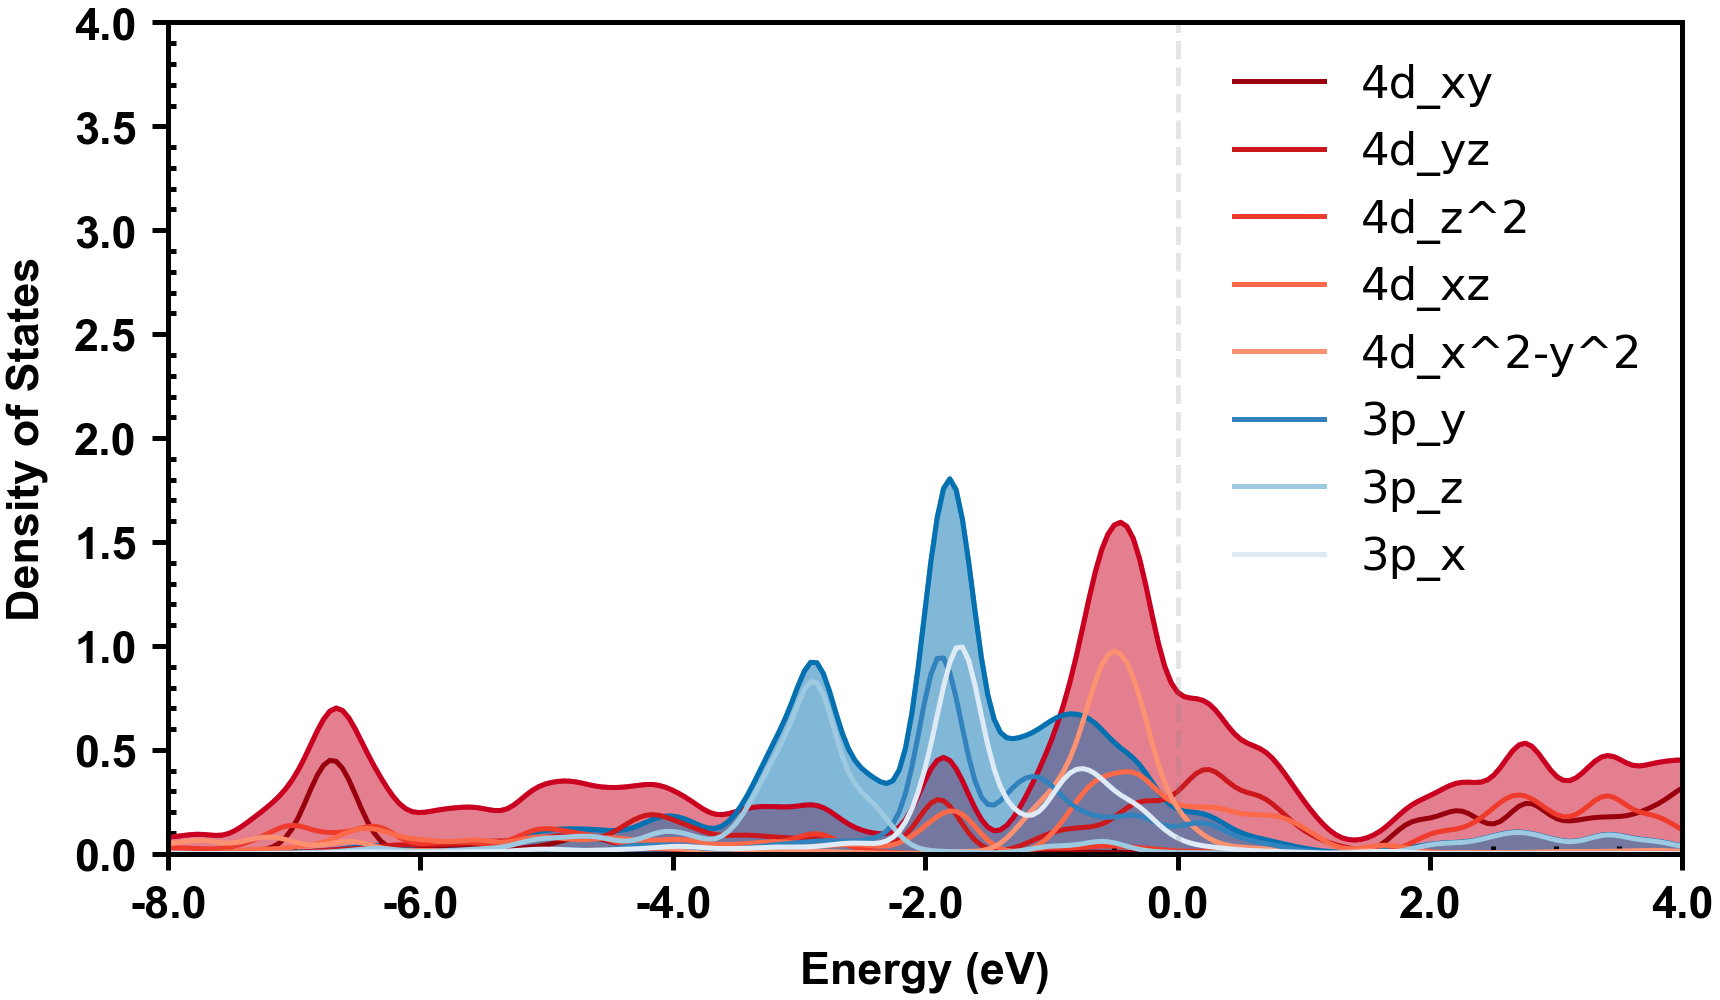

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Reds, Blues

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Reds[len(columns_to_average)]
colors2 = Blues[len(columns_to_average2)]

hi = ['Ru 5s','Ru 4p']
four_d_columns = ['4d_xy', '4d_yz', '4d_z^2', '4d_xz', '4d_x^2-y^2']
columns_to_average2 = ['3p_y','3p_z','3p_x'] 
cc= ['black','Green']

# total을 그리는 과정

plt.plot(new6_df['energy'], new6_df['Ru 4d'], color= red, linewidth=thick)
plt.fill_between(new6_df['energy'],0, new6_df['Ru 4d'], color=red, linewidth=thick,alpha=0.5)

plt.plot(new5_df['energy'], new5_df['Cl 3p'], color= blue, linewidth=thick)
plt.fill_between(new5_df['energy'],0, new5_df['Cl 3p'], color=blue, linewidth=thick,alpha=0.5)

# Plot energy vs each column

for i, col in enumerate(four_d_columns):
    plt.plot(new6_df['energy'], new6_df[col],label=col, color= colors[i], linewidth=thick)
for i, col in enumerate(columns_to_average2):
    plt.plot(new5_df['energy'], new5_df[col],label=col, color= colors2[i], linewidth=thick)

plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(0, 5, step=0.5),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-0, 4])
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('Density of States', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('5.png',dpi=150)

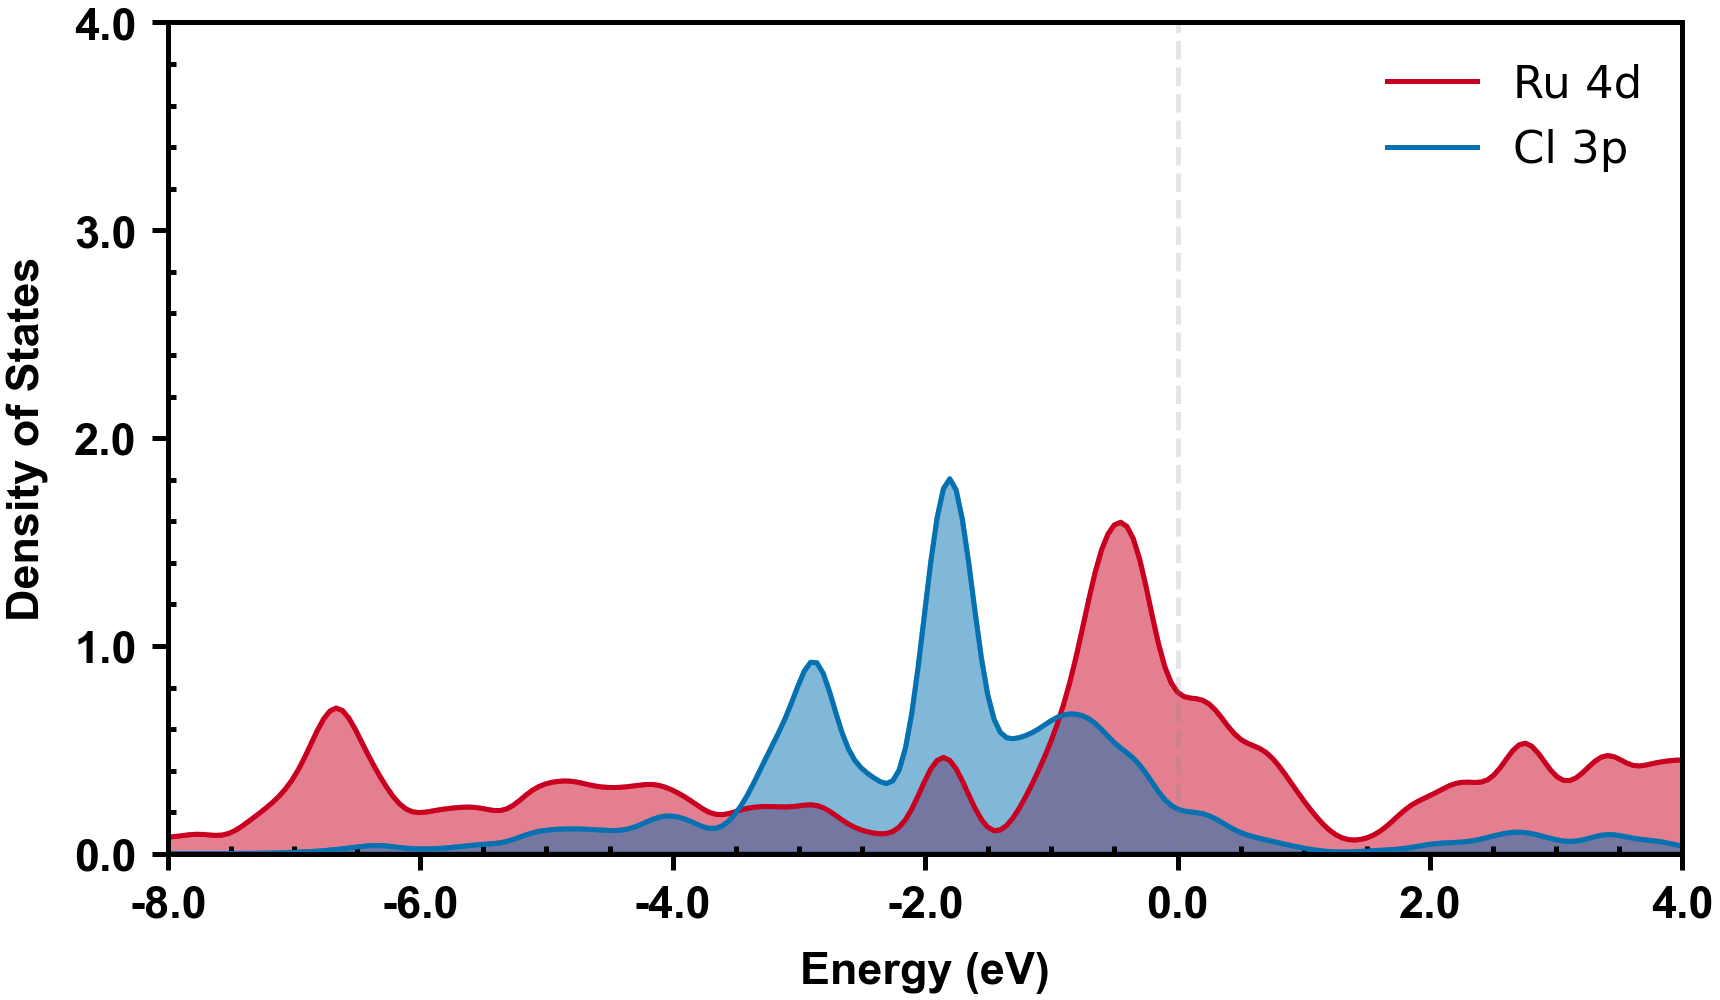

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Reds, Blues
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Reds[len(columns_to_average)]
colors2 = Blues[len(columns_to_average2)]


# Plot energy vs each column
plt.plot(new6_df['energy'], new6_df['Ru 4d'],label='Ru 4d', color= red, linewidth=thick)
plt.fill_between(new6_df['energy'],0, new6_df['Ru 4d'], color= red,linewidth=thick,alpha=0.5)
plt.plot(new5_df['energy'], new5_df['Cl 3p'],label='Cl 3p', color= blue, linewidth=thick)
plt.fill_between(new5_df['energy'],0,new5_df['Cl 3p'],color=blue,linewidth=thick,alpha=0.5)

plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(0, 5, step=1),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-0, 4.0])
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)
plt.ylabel('Density of States', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('6.png',dpi=150)

#표면 DOS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from io import StringIO

with open('/content/2.txt', 'r') as f:
    data = f.readlines()

# remove the first line of data as it contains non-numeric data
data = data[1:]

# split each line by whitespace and store the resulting list in a new list
data = [line.strip().split() for line in data]

# create a DataFrame from the data
df = pd.DataFrame(data)
df = df.drop(range(0,4))

result = df[df.eq('44;').any(1)]
indices = result.index
row_number = df.index.get_loc(indices[0])
data = df.iloc[row_number+1:row_number+662]
data.columns = ['energy','5s_up', '5s_dw', '4p_y_up', '4p_y_dw', '4p_z_up', '4p_z_dw', '4p_x_up', '4p_x_dw', '4d_xy_up', '4d_xy_dw','4d_yz_up','4d_yz_dw','4d_z^2_up','4d_z^2_dw','4d_xz_up','4d_xz_dw','4d_x^2-y^2_up','4d_x^2-y^2_dw']
data = data.apply(pd.to_numeric, errors='coerce')
columns_to_average = ['5s', '4p_y', '4p_z', '4p_x', '4d_xy', '4d_yz', '4d_z^2', '4d_xz', '4d_x^2-y^2']
for col in columns_to_average:
    data[col] = pd.concat([data[col+'_up'], data[col+'_dw']], axis=1).mean(axis=1)
data['Ru 4d'] = pd.concat([data['4d_xy'], data['4d_yz'],data['4d_z^2'],data['4d_xz'],data['4d_x^2-y^2']], axis=1).sum(axis=1)
data['Ru 4p'] = pd.concat([data['4p_y'], data['4p_z'],data['4p_x']], axis=1).sum(axis=1)
new6_df=data
new6_df


FileNotFoundError: ignored

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Reds, Blues
import matplotlib.ticker as ticker

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
colors = Reds[len(columns_to_average)]
colors2 = Blues[len(columns_to_average2)]


# Plot energy vs each column
plt.plot(new6_df['energy'], new6_df['Ru 4d'],label='d', color= red, linewidth=thick)
plt.fill_between(new6_df['energy'],0, new6_df['Ru 4d'], color= red,linewidth=thick,alpha=0.5)
plt.plot(new6_df['energy'], new6_df['Ru 4p'],label='p', color= blue, linewidth=thick)
plt.fill_between(new6_df['energy'],0,new6_df['Ru 4p'],color=blue,linewidth=thick,alpha=0.5)
plt.plot(new6_df['energy'], new6_df['5s'],label='s', color= 'orange', linewidth=thick)
plt.fill_between(new6_df['energy'],0,new6_df['5s'],color='orange',linewidth=thick,alpha=0.5)

plt.xticks(np.arange(-10.0, 5.0, step=2.0), fontproperties=prop4)
plt.yticks(np.arange(0, 5, step=1),fontproperties=prop4)
ax.set_xlim([-8.0,4.0])
ax.set_ylim([-0, 4.0])
plt.axvline(x=0, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

# Xticks
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)


# Add labels and title to the plot
plt.xlabel('Energy (eV)', fontproperties=prop4,labelpad =25)

plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('6.png',dpi=150)

#Pourbaix

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Magma, Inferno, Plasma, Viridis256, Cividis, RdBu, RdYlBu, Bokeh

cls = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']
font_name = fm.FontProperties(fname='/content/arialbd.ttf').get_name()
size= 30
ax = plt.gca()
prop4 = fm.FontProperties(fname='/content/arialbd.ttf',size=45)
prop3 = fm.FontProperties(fname='/content/arialbd.ttf',size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

def surface_pourbaix(g,name):
#  name=name.translate(subscript)

  plt.rcParams["figure.figsize"] = (14,14)

  # create data
  vv=2
  V = [0,vv]
  G_plane = [0,0]
  G_O = [g[0],g[0]-vv*2]
  G_O2 = [g[1],g[1]-vv*4]
  G_O3 = [g[2],g[2]-vv*6]
  G_O4 = [g[3],g[3]-vv*8]
  G_O5 = [g[4],g[4]-vv*10]
  G_O6 = [g[5],g[5]-vv*12]
  G_O7 = [g[6],g[6]-vv*14]
  G_O8 = [g[7],g[7]-vv*16]
  G_O9 = [g[8],g[8]-vv*18]
  cls=RdBu[8]
    # plot lines

  plt.plot(V,G_plane, label = "*", c=cls[0], linewidth=thick)
  plt.plot(V, G_O, label = "O$_{ 1/8ML}$",c=cls[1], linewidth=thick)
  plt.plot(V, G_O2, label = "O$_{ 2/8ML}$",c=cls[2], linewidth=thick)
  plt.plot(V, G_O3, label = "O$_{ 3/8ML}$",c=cls[3], linewidth=thick)
  plt.plot(V, G_O4, label = "O$_{ 4/8ML}$",c=cls[4], linewidth=thick)
  plt.plot(V, G_O5, label = "O$_{ 5/8ML}$",c=cls[5], linewidth=thick)
  plt.plot(V, G_O6, label = "O$_{ 6/8ML}$",c=cls[6], linewidth=thick)
  plt.plot(V, G_O7, label = "O$_{ 7/8ML}$",c=cls[7], linewidth=thick)
#  plt.plot(V, G_O8, label = "$O_{ 1ML}$",c='black', linewidth=thick)
#  plt.plot(V, G_O9, label = "$O_{ 1ML+O}$",c='gray', linewidth=thick)

  plt.axvline(x=1.23, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)
  plt.axvline(x=1.36, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

  th1 = plt.text(1.23, -4, 'OER 1.23V',alpha=0.3, rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom',fontproperties=prop4)
  th1 = plt.text(1.36, -4, 'ClER 1.36V',alpha=0.3, rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom',fontproperties=prop4)

#  plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)
  plt.xticks(np.arange(0.2, 2.2, step=0.4),fontproperties=prop4)
  plt.yticks(np.arange(-20, 3, step=5),fontproperties=prop4)

  plt.tick_params( axis='x', width =thick,length=16, pad=15) # labels along the bottom edge are off
  plt.tick_params( axis='y', width =thick,length=16, pad=15) # labels along the bottom edge are off

  ax.minorticks_on()
  ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)

  for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width
  plt.ylabel('ΔG (eV)',fontproperties=prop4,labelpad =25)
  plt.xlabel('E (V RHE)',fontproperties=prop4,labelpad =25)
  plt.margins(x=0,y=0)
  plt.xlim([0, 2])
  plt.ylim([-20,1])
  plt.tight_layout()
  plt.savefig('hi',dpi=100)

go1=-1.23 
go2=go1+-1.16 
go3=go2+0.65 
go4=go3+0.76 
go5=go4+0.84 
go6=go5+-0.20 
go7=go6+1.49 
go8=go7+1.72 
go9=go8+2.12

g_sac=[go1,go2,go3,go4,go5,go6,go7,go8,go9]
surface_pourbaix(g_sac,'Ru/Ti4O7'.translate(subscript))


#Ti4O7 pourbaix

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Magma, Inferno, Plasma, Viridis256, Cividis, RdBu, RdYlBu, Bokeh

cls = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']
font_name = fm.FontProperties(fname='/content/arialbd.ttf').get_name()
size= 30
ax = plt.gca()
prop4 = fm.FontProperties(fname='/content/arialbd.ttf',size=45)
prop3 = fm.FontProperties(fname='/content/arialbd.ttf',size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

def surface_pourbaix(g,name):
#  name=name.translate(subscript)

  plt.rcParams["figure.figsize"] = (14,14)

  # create data
  vv=2
  V = [0,vv]
  G_plane = [0,0]
  G_O = [g[0],g[0]-vv*2]
  G_O2 = [g[1],g[1]-vv*4]
  G_O3 = [g[2],g[2]-vv*6]
  G_O4 = [g[3],g[3]-vv*8]
  G_O5 = [g[4],g[4]-vv*10]
  G_O6 = [g[5],g[5]-vv*12]
  G_O7 = [g[6],g[6]-vv*14]
  G_O8 = [g[7],g[7]-vv*16]
  G_O9 = [g[8],g[8]-vv*18]
  cls=RdBu[8]
    # plot lines

  plt.plot(V,G_plane, label = "*", c=cls[0], linewidth=thick)
  plt.plot(V, G_O, label = "O$_{ 1/8ML}$",c=cls[1], linewidth=thick)
  plt.plot(V, G_O2, label = "O$_{ 2/8ML}$",c=cls[2], linewidth=thick)
  plt.plot(V, G_O3, label = "O$_{ 3/8ML}$",c=cls[3], linewidth=thick)
  plt.plot(V, G_O4, label = "O$_{ 4/8ML}$",c=cls[4], linewidth=thick)
  plt.plot(V, G_O5, label = "O$_{ 5/8ML}$",c=cls[5], linewidth=thick)
#  plt.plot(V, G_O6, label = "O$_{ 6/8ML}$",c=cls[6], linewidth=thick)
#  plt.plot(V, G_O7, label = "O$_{ 7/8ML}$",c=cls[7], linewidth=thick)
#  plt.plot(V, G_O8, label = "$O_{ 1ML}$",c='black', linewidth=thick)
#  plt.plot(V, G_O9, label = "$O_{ 1ML+O}$",c='gray', linewidth=thick)

  plt.axvline(x=1.23, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)
  plt.axvline(x=1.36, linestyle='dashed', alpha=0.2,c='gray', linewidth=thick)

  th1 = plt.text(1.23, -4, 'OER 1.23V',alpha=0.3, rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom',fontproperties=prop4)
  th1 = plt.text(1.36, -4, 'ClER 1.36V',alpha=0.3, rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom',fontproperties=prop4)

#  plt.legend(fontsize=14, prop={'family': font_name,'size':45}, frameon=False)
  plt.xticks(np.arange(0.2, 2.2, step=0.4),fontproperties=prop4)
  plt.yticks(np.arange(-20, 3, step=5),fontproperties=prop4)

  plt.tick_params( axis='x', width =thick,length=16, pad=15) # labels along the bottom edge are off
  plt.tick_params( axis='y', width =thick,length=16, pad=15) # labels along the bottom edge are off
  
  ax.minorticks_on()
  ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
  for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width
  plt.ylabel('ΔG (eV)',fontproperties=prop4,labelpad =25)
  plt.xlabel('E (V RHE)',fontproperties=prop4,labelpad =25)
  plt.margins(x=0,y=0)
  plt.xlim([0, 2])
  plt.ylim([-15,1])
  plt.tight_layout()
  plt.savefig('hi2.png',dpi=100)

go1=-1.12
go2=go1+-0.58 
go3=go2+1.01
go4=go3+1.65 
go5=go4+3.21

g_sac=[go1,go2,go3,go4,go5,go6,go7,go8,go9]
surface_pourbaix(g_sac,'Ru/Ti4O7'.translate(subscript))


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Magma, Inferno, Plasma, Viridis256, Cividis, RdBu, RdYlBu, Bokeh

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
refer =['DSA','TiO2','RuO2','RuCl3(g)']
team = ['RuCl3/Ti4O7','Bare','1O*','2O*','3O*','4O*','5O*','6O*','7O*']
ru_bader = [0.899,0.142,0.20,0.73219,0.733068,0.93748,1.450211,1.511941,1.568728]
refer_bader =[1.65,0,1.63,1.12]


ax.axhline(y=refer_bader[0], alpha=1,c='black', linestyle='--', linewidth=thick)
ax.axhline(y=refer_bader[2], alpha=1,c=RdBu[4][1], linestyle='--', linewidth=thick)
ax.axhline(y=refer_bader[3], alpha=1,c=RdBu[4][0], linestyle='--', linewidth=thick)

x_axis = np.arange(len(team))-0.5
plt.bar(x_axis+0.5, ru_bader, width=0.5,color =blue, edgecolor='black', linewidth=thick)


# Xticks
plt.xticks(x_axis+0.5,team,rotation=-45)
#plt.legend(frameon=False,prop={'family': font_name,'size':20})
plt.ylabel('Bader Charge of Ru (|e|)',fontproperties=prop4,labelpad=20.0)
plt.margins(x=0,y=0)
plt.yticks(np.arange(0, 2, step=0.5),fontproperties=prop4)
plt.ylim((0,2.0))
plt.xticks(fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)
plt.xticks(np.arange(0, 10, step=1), fontproperties=prop4)

plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width

ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_tick_params(which='minor', bottom=False)

plt.tight_layout()
plt.savefig('int_ads_h_presense.png',dpi=150)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Magma, Inferno, Plasma, Viridis256, Cividis, RdBu, RdYlBu, Bokeh

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
plt.rcParams["figure.figsize"] = (24,14)
ax = plt.gca()
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5
blue=RdBu[4][0]
red=RdBu[4][3]
refer =['DSA','TiO2','RuO2','RuCl3(g)']
team = ['RuCl3/Ti4O7','Bare','1O*','2O*','3O*','4O*','5O*','6O*','7O*']
ru_bader = [1.84,1.832,1.845579813,1.851547781,1.863950781,1.869358031,1.870447625,1.880445938,1.889750875]
refer_bader =[1.93,1.94,0,0]
x_axis = np.arange(len(team))-0.5

# Multi bar Chart
ax.axhline(y=refer_bader[0], alpha=1,c='black', linestyle='--', linewidth=thick)
ax.axhline(y=refer_bader[1], alpha=1,c='gray', linestyle='--', linewidth=thick)
ax.axhline(y=1.85, alpha=1,c='lightgray', linestyle='--', linewidth=thick)

plt.bar(x_axis+0.5, ru_bader, width=0.5,color ='gray', edgecolor='black', linewidth=thick)

# Xticks
plt.axhline(y=0,color ='black',linewidth=thick)
plt.xticks(x_axis+0.5,team,rotation=-45)
#plt.legend(frameon=False,prop={'family': font_name,'size':20})

plt.ylabel('Bader Charge of Ti (|e|)',fontproperties=prop4,labelpad=20.0)
plt.margins(x=0,y=0)
plt.yticks(np.arange(0, 3.0, step=0.5),fontproperties=prop4)

plt.ylim((1.3,2))

plt.xticks(np.arange(0, 10, step=1), fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)
plt.margins(x=0.1,y=0.1)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width


plt.tight_layout()
plt.savefig('int_ads_h_presense2.png',dpi=150)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from bokeh.palettes import Magma, Inferno, Plasma, Viridis256, Cividis, RdBu, RdYlBu, Bokeh

path= '/content/arialbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
size= 20
fig = plt.figure(figsize=(20,20))
ax = fig.add_axes((0,0,.5,1))

prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
blue=RdBu[4][0]
red=RdBu[4][3]
team=["Cl_3s-Ru_4dxy", "Cl_3p_y-Ru_4dxy", "Cl_3p_z-Ru_4dxy", "Cl_3p_x-Ru_4dxy", "Cl_3s-Ru_4dyz", "Cl_3p_y-Ru_4dyz", "Cl_3p_z-Ru_4dyz", "Cl_3p_x-Ru_4dyz", "Cl_3s-Ru_4dz2", "Cl_3p_y-Ru_4dz2", "Cl_3p_z-Ru_4dz2", "Cl_3p_x-Ru_4dz2", "Cl_3s-Ru_4dxz", "Cl_3p_y-Ru_4dxz", "Cl_3p_z-Ru_4dxz", "Cl_3p_x-Ru_4dxz", "Cl_3s-Ru_4dx2y2", "Cl_3p_y-Ru_4dx2y2", "Cl_3p_z-Ru_4dx2y2", "Cl_3p_x-Ru_4dx2y2"]
ruo2=[0, 0, 0, 0, 0, 0.155, 0, 0, 0.170, 0, 0.610, 0, 0, 0, 0, 0.097, 0.000, 0, 0.002, 0]
rusac=[0.099, 0.112, 0.001, 0.328, 0.000, 0.001, 0.062, 0.005, 0.029, 0.062, 0.008, 0.066, 0.000, 0.001, 0.060, 0.008, 0.009, 0.046, 0.001, 0.006]

#plt.bar(x_axis+0.5,ruo2, width=0.4,color =RdBu[8], edgecolor='black', linewidth=thick)
#ax.axhline(y=1.36, alpha=0.5,c='gray', linestyle='--', linewidth=thick)

#ax.pie(ruo2, colo#rs=RdBu[8], radius=2, center=(4, 4),wedgeprops={"linewidth": 1, "edgecolor": "white"}, labels=team, frame=True)

wedges, texts = ax.pie(ruo2, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center",fontproperties=prop4)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(team[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.savefig('1_clmech.png',dpi=150)

#Rxn Diagram

#CER

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from scipy import stats
from matplotlib import gridspec
from scipy.optimize import curve_fit
xls = pd.ExcelFile('/content/raw_data_dft.xlsx')
df = pd.read_excel(xls,'CER')
df1 = pd.read_excel(xls,'CER',skiprows=[3,4,9,10,11,12])
df_oer = pd.read_excel(xls,'OER',skiprows=[2,4,6,11,12,13,14])
df_cl = pd.read_excel(xls,'CER',skiprows=[2,3,4,6,7,8,10,11,12,13,14])
df_ocl = pd.read_excel(xls,'CER',skiprows=[1,3,4,5,7,8,9,11,12,13,14])


In [ ]:
df

In [ ]:
df_cl

In [ ]:
df_oer

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import matplotlib.font_manager as fm

volt=0
cl2 = 2.72-volt*2
cls = ['#c23b22','#c23b22','black','black','#2259c2','#2259c2','#c23b22','#c23b22','black','black','#2259c2','#2259c2']
font_name = fm.FontProperties(fname='/content/arialbd.ttf').get_name()
size= 30
prop4 = fm.FontProperties(fname='/content/arialbd.ttf',size=45)
prop3 = fm.FontProperties(fname='/content/arialbd.ttf',size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

fig = plt.figure(figsize=(9,12))
ax = plt.gca()

ax.set_ylim(-0.2,2.8)
ax.set_xlim(-0.5,5.5)

ax.set_xticks([0.5,2.5,4.5])
#ax.set_xticklabels(['*','Cl*','Cl$_2$'], fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)
ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_tick_params(which='minor', bottom=False)

#yticks =[-1.0,-0.5,0.0,0.5]
yticks =np.arange(0, 3, step=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontproperties=prop4)
ax.set_ylabel("ΔG(eV)", fontproperties=prop4)
ax.plot([0,1],[0,0],c='black', linewidth=thick)
ax.plot([4,5],[cl2,cl2],c='black', linewidth=thick)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width
  ax.spines[axis].set_color(cls[0])

plt.margins(x=0.01)
plt.margins(y=0.01)
for i, value in enumerate(df_cl.values) :
      color = cls[i*2]
      print(value[3])
      gcl=value[3]-volt
      ax.plot([1,2],[0,gcl+0.01],'--', c = color, linewidth=thick-1,alpha=0.5)
      ax.plot([2,3],[gcl,gcl],c = color, linewidth=thick)
      ax.plot([3,4],[gcl-0.01,cl2],'--', c = color, linewidth=thick-1,alpha=0.5)
#      ax.text(2.1,gcl+0.04,round(gcl,2), c = color,fontproperties=prop3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.tight_layout()
plt.savefig('1_clmech.png',dpi=150)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import matplotlib.font_manager as fm

volt=0
cl2 = 2.72-volt*2
cls = ['#c23b22','#c23b22','black','black','#2259c2','#2259c2','#2259c2']
font_name = fm.FontProperties(fname='/content/arialbd.ttf').get_name()
size= 30
prop4 = fm.FontProperties(fname='/content/arialbd.ttf',size=45)
prop3 = fm.FontProperties(fname='/content/arialbd.ttf',size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

fig = plt.figure(figsize=(9,12))
ax = plt.gca()

ax.set_ylim(-0.2,2.8)
ax.set_xlim(-0.5,5.5)

ax.set_xticks([0.5,2.5,4.5])
#ax.set_xticklabels(['O*','ClO*','O*+Cl$_2$'], fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)
ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_tick_params(which='minor', bottom=False)

#yticks =[-1.0,-0.5,0.0,0.5]
yticks =np.arange(0, 3, step=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontproperties=prop4)
ax.set_ylabel("ΔG(eV)", fontproperties=prop4)
ax.plot([0,1],[0,0],c='black', linewidth=thick)
ax.plot([4,5],[cl2,cl2],c='black', linewidth=thick)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width
  ax.spines[axis].set_color(cls[0])

plt.margins(x=0.01)
plt.margins(y=0.01)
for i, value in enumerate(df_ocl.values) :
      color = cls[i*2]
      gcl=value[3]-volt
      ax.plot([1,2],[0,gcl+0.01],'--', c = color, linewidth=thick-1,alpha=0.5)
      ax.plot([2,3],[gcl,gcl],c = color, linewidth=thick)
      ax.plot([3,4],[gcl-0.01,cl2],'--', c = color, linewidth=thick-1,alpha=0.5)
#      ax.text(2.1,gcl+0.04,round(gcl,2), c = color,fontproperties=prop3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.tight_layout()
plt.savefig('1_oclmech.png',dpi=150)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import matplotlib.font_manager as fm

volt=0
cl2 = 2.72-volt*2
cls = ['#c23b22','#c23b22','black','black','#2259c2','#2259c2','white']
font_name = fm.FontProperties(fname=path).get_name()
size= 30
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

fig2 = plt.figure(figsize=(16,12))
ax2 = plt.gca()

ax2.set_ylim(-0.2,5.5)
ax2.set_xlim(-0.5,9.5)

ax2.set_xticks([0.5,2.5,4.5,6.5,8.5])
#ax.set_xticklabels(['2H$_2$O+*','H$_2$O+OH+(H$^'+'$*','O*','OOH*','O$_2$'], fontproperties=prop4)
ax2.tick_params(width=thick,pad =15,length=16)
ax2.minorticks_on()
ax2.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax2.xaxis.set_tick_params(which='minor', bottom=False)

yticks =np.arange(0, 6, step=1)
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticks, fontproperties=prop4)
ax2.set_ylabel("ΔG(eV)", fontproperties=prop4,labelpad=20.0)
ax2.plot([0,1],[0,0],c='black', linewidth=thick)
for axis in ['top', 'bottom', 'left', 'right']:
  ax2.spines[axis].set_linewidth(thick)  # change width
  
plt.margins(x=0.01)
plt.margins(y=0.01)
for i, value in enumerate(df_oer.values) :
      color = cls[i*2]
      gcl=value[3]-volt
      #OER step
      OER_step1 = value[3] - volt
      OER_step2 = value[5] - volt*2
      OER_step3 = value[7] - volt*3
      ax2.plot([1,2],[0,OER_step1], '--', c = color, linewidth=thick-1,alpha=0.5)
      ax2.plot([2,3],[OER_step1,OER_step1] , c = color, linewidth=thick)
      ax2.plot([3,4],[OER_step1,OER_step2],'--',  c = color, linewidth=thick-1,alpha=0.5)
      ax2.plot([4,5],[OER_step2,OER_step2] , c = color, linewidth=thick)
      ax2.plot([5,6],[OER_step2,OER_step3],'--',  c = color, linewidth=thick-1,alpha=0.5)
      ax2.plot([6,7],[OER_step3,OER_step3] , c = color, linewidth=thick)       
      ax2.plot([7,8],[OER_step3,4.92-4*volt] ,'--',  c = color, linewidth=thick-1,alpha=0.5) 
ax2.plot([8,9],[4.92-4*volt,4.92-4*volt] , c = 'black', linewidth=thick) 
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.savefig('1_oer.png',dpi=150)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import matplotlib.font_manager as fm

volt=0
cl2 = 2.72-volt*2
cls = ['#c23b22','#c23b22','black','black','#2259c2','#2259c2','#2259c2','#2259c2','#2259c2','#2259c2','#2259c2']
font_name = fm.FontProperties(fname=path).get_name()
size= 30
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

fig = plt.figure(figsize=(12,16))
ax = plt.gca()

ax.set_ylim(-1,0.8)
ax.set_xlim(-0.5,5.5)

ax.set_xticks([0.5,2.5,4.5])
ax.set_xticklabels(['O*','OCl*','Cl$_2$'], fontproperties=prop4)
ax.tick_params(width=thick,pad =15,length=16)
ax.minorticks_on()
ax.tick_params(which='minor', length=8, width=thick, direction='in',pad=-15)
ax.xaxis.set_tick_params(which='minor', bottom=False)

yticks =[-1.0,-0.5,0.0,0.5]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontproperties=prop4)
ax.set_ylabel("ΔG(eV)", fontproperties=prop4)
ax.plot([0,1],[0,0],c='black', linewidth=thick)
ax.plot([4,5],[cl2,cl2],c='black', linewidth=thick)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width

plt.margins(x=0.01)
plt.margins(y=0.01)
i=0
for i, value in enumerate(df_ocl.values) :
      color = cls[i*2]
      gcl=value[3]-volt
      ax.plot([1,2],[0,gcl], c = color, linewidth=thick,alpha=0.5)
      ax.plot([2,3],[gcl,gcl],c = color, linewidth=thick)
      ax.plot([3,4],[gcl,cl2], c = color, linewidth=thick,alpha=0.5)
#      ax.text(2.1,gcl+0.04,round(gcl,2), c = color,fontproperties=prop3)

plt.tight_layout()
plt.savefig('oclmech.png',dpi=150)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import matplotlib.font_manager as fm

volt=1.36
cl2 = 2.72-volt*2
cls = ['red','red','black','black','blue','blue']
font_name = fm.FontProperties(fname=path).get_name()
size= 30
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

fig = plt.figure(figsize=(12,16))
ax = plt.gca()

ax.set_ylim(-1,0.8)
ax.set_xlim(-0.5,5.5)

ax.set_xticks([0.5,2.5,4.5])
ax.set_xticklabels(['*','Cl*','Cl$_2$'], fontproperties=prop4)
ax.tick_params(width=thick,pad =15, length =7 )

yticks =[-1.0,-0.5,0.0,0.5]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontproperties=prop4)
ax.set_ylabel("ΔG(eV)", fontproperties=prop4)
ax.plot([0,1],[0,0],c='black', linewidth=thick)
ax.plot([4,5],[cl2,cl2],c='black', linewidth=thick)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width

plt.margins(x=0.01)
plt.margins(y=0.01)
for i, value in enumerate(df_cl.values) :
      color = cls[i*2]
      gcl=value[3]-volt
      ax.plot([1,2],[0,gcl], c = color, linewidth=thick,alpha=0.5)
      ax.plot([2,3],[gcl,gcl],c = color, linewidth=thick)
      ax.plot([3,4],[gcl,cl2], c = color, linewidth=thick,alpha=0.5)
#      ax.text(2.1,gcl+0.04,round(gcl,2), c = color,fontproperties=prop3)

plt.tight_layout()
plt.savefig('clmech.png',dpi=150)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import matplotlib.font_manager as fm

volt=1.36
cl2 = 2.72-volt*2
cls = ['red','red','black','black','blue','blue']
font_name = fm.FontProperties(fname=path).get_name()
size= 30
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5

fig = plt.figure(figsize=(16,12))
ax = plt.gca()

ax.set_ylim(-1,1)
ax.set_xlim(-0.5,9.5)

ax.set_xticks([0.5,2.5,4.5,6.5,8.5])
ax.set_xticklabels(['*','OH*','O*','OOH*','O$_2$'], fontproperties=prop4)
ax.tick_params(width=thick,pad =15, length =7 )

yticks =[-1.5,-1.0,-0.5,0.0,0.5,1.0]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontproperties=prop4)
ax.set_ylabel("ΔG(eV)", fontproperties=prop4)
ax.plot([0,1],[0,0],c='black', linewidth=thick)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width

plt.margins(x=0.01)
plt.margins(y=0.01)
for i, value in enumerate(df_oer.values) :
      color = cls[i*2]
      gcl=value[3]-volt
      #OER step
      OER_step1 = value[3] - volt
      OER_step2 = value[5] - volt*2
      OER_step3 = value[7] - volt*3
      ax.plot([1,2],[0,OER_step1], c = color, linewidth=thick,alpha=0.3)
      ax.plot([2,3],[OER_step1,OER_step1] , c = color, linewidth=thick)
      ax.plot([3,4],[OER_step1,OER_step2], c = color, linewidth=thick,alpha=0.3)
      ax.plot([4,5],[OER_step2,OER_step2] , c = color, linewidth=thick)
      ax.plot([5,6],[OER_step2,OER_step3], c = color, linewidth=thick,alpha=0.3)
      ax.plot([6,7],[OER_step3,OER_step3] , c = color, linewidth=thick)       
      ax.plot([7,8],[OER_step3,4.92-4*volt] , c = color, linewidth=thick,alpha=0.3) 
      ax.plot([8,9],[4.92-4*volt,4.92-4*volt] , c = color, linewidth=thick) 

plt.tight_layout()
plt.savefig('oer.png',dpi=150)

In [ ]:
df_cat=df_cl
df_cat['goh']=df_oer['GOH']
df_cat['go']=df_oer['GO']
df_cat['gooh']=df_oer['GOOH']
df_cat['gocl']=df_ocl['GCl']


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import matplotlib.font_manager as fm

volt=0
cl2 = 2.72-volt*2
cls = ['red','red','black','black','blue','blue']
font_name = fm.FontProperties(fname=path).get_name()
size= 30
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5


OER_bgcolor = 'black'
CER_bgcolor = 'red'

fig = plt.figure(figsize=(30,12))
ax = plt.gca()

ax.set_xticks([-3.5,-1.5,0.5,2.5,4.5,6.5,8.5])
ax.set_xticklabels(['Cl$_2$','Cl*','*','OH*','O*','OCl*','O*+Cl$_2$'], fontproperties=prop3)

# background 색깔지정
ax.margins(0) 
#ax.axvspan(-4,.5, facecolor=CER_bgcolor, alpha=0.1)
#ax.axvspan(.5, 4.5, facecolor=OER_bgcolor , alpha=0.1)
#ax.axvspan(4.5, 9, facecolor=CER_bgcolor , alpha=0.1)

ax.set_ylabel("ΔG(eV)", fontproperties=prop4)
#x.axvline(0.5,linestyle = '--',color='black')
#ax.axvline(4.5,linestyle = '--',color='black')

# CER 및 OER initial, final 표시
CER_fin = 2.72 - 2*volt
OER_fin = (1.23-volt)*4

ax.plot([-3,-4],[CER_fin,CER_fin],c='black', linewidth=thick,alpha=1)
ax.plot([0,1],[0,0],c='black', linewidth=thick,alpha=1)
ax.plot([8,9],[OER_fin,OER_fin],'--',c='black', linewidth=thick,alpha=0.3)
minmax = [0]

# CER/OER plot
for i, value in enumerate(df_cat.values) :
    color = cls[i*2]

    # CER step
    CER_step1 = value[3]-volt

    ax.plot([0,-1],[0,CER_step1],c = color, linewidth=thick,alpha=0.3)
    ax.plot([-1,-2],[CER_step1,CER_step1],c = color, linewidth=thick)
    ax.plot([-2,-3],[CER_step1,CER_fin],c = color, linewidth=thick,alpha=0.3)

    #OER step
    OER_step1 = value[7] - volt
    OER_step2 = value[8] - volt*2
    OER_step3 = value[9] - volt*3
    ax.plot([1,2],[0,OER_step1], c = color, linewidth=thick,alpha=0.3)
    ax.plot([2,3],[OER_step1,OER_step1] , c = color, linewidth=thick)
    ax.plot([3,4],[OER_step1,OER_step2], c = color, linewidth=thick,alpha=0.3)
    ax.plot([4,5],[OER_step2,OER_step2] , c = color, linewidth=thick)
    ax.plot([5,6],[OER_step2,OER_step3],'--', c = color, linewidth=thick,alpha=0.3)
    ax.plot([6,7],[OER_step3,OER_step3] ,'--', c = color, linewidth=thick,alpha=0.3)       
    ax.plot([7,8],[OER_step3,OER_fin] ,'--', c = color, linewidth=thick,alpha=0.3) 
    # OCl step
    ocl_step1 = value[10]+value[8]-volt*3

    ax.plot([5,6],[OER_step2,ocl_step1],c = color, linewidth=thick,alpha=0.3)
    ax.plot([6,7],[ocl_step1,ocl_step1],c = color, linewidth=thick)
    ax.plot([7,8],[ocl_step1,OER_step2],c = color, linewidth=thick,alpha=0.3)
    ax.plot([8,9],[OER_step2,OER_step2],c = color, linewidth=thick,alpha=1)
       

    appendlist = [CER_step1,CER_fin,OER_step1,OER_step2,OER_step3,OER_fin]
    for j in appendlist : minmax.append(j)
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(thick)  # change width

plt.margins(x=0.05)
plt.margins(y=0.05)
# ytick, ylim 지정. ylim은 max값과 min값 차이 + 5% 
rg = abs(np.min(np.array(minmax))) +abs(np.max(np.array(minmax)))
ax.set_ylim(0,6)
ax.set_yticklabels([-1.6,-1.2,-0.80,-0.4,0.0,0.4,0.80,1.20,1.60], fontproperties=prop3)
ax.tick_params(width=thick,pad =15, length =7 )

plt.show()

# Ru SAC용으로 그냥 하나 더그림. (OCl계산이 덜되서)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange


cls = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']
font_name = fm.FontProperties(fname=path).get_name()
size= 30
prop4 = fm.FontProperties(fname=path,size=45)
prop3 = fm.FontProperties(fname=path,size=35)
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
thick=5


class MyList(list):
    def __init__(self, *args):
        super(MyList, self).__init__(args)

    def __sub__(self, other):
        return self.__class__(*[item for item in self if item not in other])

subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
global label_exist1
global label_exist2
label_exist1 = 1
label_exist2 = 1
itms = ['OH*', 'O*', 'OOH*', 'Cl*','OCl*', '*+Cl2(g)'.translate(subscript),  'O*+Cl2(g)'.translate(subscript),'O+Cl']
my_palette = ['#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458','#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458']


ne= [1, 2,3,1,3, 2, 4, 3] # 이동한 전자수.

def volt(list1,list2):
  difference = []
  zip_object = zip(list1, list2)
  for list1_i, list2_i in zip_object:
      difference.append(list1_i-list2_i)
  return difference

def liner(value,position,name,mech,nth):  #G, nth e+H transfer, intermediate,
    x=[position,position+1]
    l=[value,value]
    if(mech == 'i1'):
      plt.plot(x,l,color = 'black', linewidth=thick)
#      plt.text(position+1.1,value-0.04,name, fontsize=16)
      plt.text(position+0.2,value+0.05,name,fontproperties=prop4)
    elif(mech == 'g'):
      plt.plot(x,l,color = my_palette[nth], linewidth=thick)
 #     plt.text(position+1.1,value-0.04,name,color = my_palette[nth], fontsize=16)
      plt.text(position+0.2,value+0.05,name,color = my_palette[nth],fontproperties=prop4)
    else:
      plt.plot(x,l,color = my_palette[nth], linewidth=thick)
      plt.text(position+1.1,value-0.04,name,fontproperties=prop4)      
    return

def connector(initial,final,position,mech,nth):#G1 ,G2, nth e+H transfer
  span=0.1
  c_fill1=[initial+span,final+span]
  c_fill2=[initial-span,final-span]
  c=[initial,final]
  x=[position,position+1]
  if(mech == 'oer'):
   plt.plot(x,c,'--',color = 'black',linewidth=thick-2)
  else:
   plt.plot(x,c,'--',color = my_palette[nth],linewidth=thick-2)

  return

def lines(catalyst,v,nth):#surface, applied potential
  voltage = [element * v for element in ne]
  a=catalyst
  c=volt(a,voltage)
  liner(c[0],2,itms[0],'i1',nth) # OH
  liner(c[1],4,itms[1],'i1',nth) # O
  liner(c[2],6,itms[2],'i1',nth) # OOH
  liner(c[3],2,itms[3],'g',nth) # Cl
  liner(c[4],6,itms[4],'g',nth) # OCl
  liner(c[7],6,itms[7],'g',nth) # O+Cl
#  liner(c[4],2,itms[4],'i1',nth) # Cl on Ru-O
#  liner(c[7],2,itms[7],'i1',nth) # Cl on Ti-O
#  liner(c[5],4,itms[5],'i1',nth) # Cl2
#  liner(c[6],8,itms[6],'i1',nth) # o+Cl2

  return

def connection(catalyst,v,nth):#surface, applied potential
  voltage = [element * v for element in ne]
  a=catalyst
  c=volt(a,voltage)
  connector(0,c[0],1,'oer',nth) 
#  connector(0,c[4],1,'cer',nth) # Cl on Ru-O
#  connector(0,c[7],1,'cer',nth) # Cl on Ru-O
  connector(c[0],c[1],3,'oer',nth) 
  connector(c[1],c[2],5,'oer',nth) 
  connector(c[2],4.92-v*4,7,'oer',nth) 
  connector(0,c[3],1,'cer',nth) 
  connector(c[3],c[5],3,'cer',nth)
  connector(c[1],c[4],5,'cer',nth) # OCl
  connector(c[1],c[7],5,'cer',nth) # O+Cl
  connector(c[4],c[6],7,'cer',nth) # OCl
  connector(c[7],c[6],7,'cer',nth) # O+Cl
#  connector(c[4],c[5],3,'cer',nth) # Cl on Ru-O
#  connector(c[7],c[5],3,'cer',nth) # Cl on Ru-O

  return

def gas_phase(catalyst,vo,nth):#surface, applied potential
  voltage = [element * vo for element in ne]
  a=catalyst
  c=volt(a,voltage)
  plt.plot([0,1],[0,0],color = 'black', linewidth=thick)
  plt.plot([8,9],[4.92-vo*4,4.92-vo*4],color = 'black', linewidth=thick)
  plt.plot([4,5],[2.72-vo*2,2.72-vo*2],color = my_palette[nth], linewidth=thick)
  plt.plot([8,9],[c[6],c[6]],color = my_palette[nth], linewidth=thick)
  plt.text(0.2,0.15,'H2O(g)'.translate(subscript),fontproperties=prop4)
  plt.text(0.2,0.65,'Cl(aq)'.translate(subscript),fontproperties=prop4,color = my_palette[nth])
  plt.text(8.2,4.92-vo*4+0.15,'O2(g)'.translate(subscript),fontproperties=prop4)
  plt.text(4.2,2.72-vo*2+0.15,'Cl2(g)'.translate(subscript),fontproperties=prop4,color = my_palette[nth])
  plt.text(8.2,c[6]+0.15,'O*+Cl2(g)'.translate(subscript),fontproperties=prop4,color = my_palette[nth])

def plotall(cat,vo,nth,name):
  voltage = [element * vo for element in ne]
  a=cat
  c=volt(a,voltage)
  plt.rcParams["figure.figsize"] = (24,10)
  ax = plt.gca()
  ax.set_xlim([-0.3, 10])
#  ax.set_ylim([0-vo*2, 3+(-vo+1.23)*4])
  ax.set_ylim([-2, 2])

  lines(cat,vo,nth)
  connection(cat,vo,nth)
  gas_phase(cat,vo,nth)
  ax.tick_params(width=3)

#  overpotential_calculator(cat,vo,nth)
  for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(thick)  # change width
  plt.margins(x=0.01)
  plt.margins(y=0.01)
  plt.xlabel('Reaction coordinate',fontproperties=prop4)
  plt.ylabel('ΔG (eV)',fontproperties=prop4)
  plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False) # labels along the bottom edge are off
  plt.yticks(np.arange(-2, 2, step=0.5),fontproperties=prop4)
  plt.tick_params(    axis='y')       # labels along the bottom edge are off
  plt.text(0.2,-1.4,name,fontproperties=prop4)
  #plt.text(0.2,-1.4,name+' at '+str(vo)+'$V_{RHE}$',fontproperties=prop4)
  plt.tight_layout()
  return

#'OH*', 'O*', 'OOH*', 'Cl*on Ru','OCl*', '*+Cl2(g)'.translate(subscript),  'O*+Cl2(g)'.translate(subscript),'O+Cl'

  

temp1=[0.33,1.72,0.33+3.1,1.43,1.72+1.44,2.72,1.72+2.72,1.72+1.21]
name1 = 'Ru@Ti4O7'.translate(subscript)
temp2=[0.64,1.54,0.64+3.1,0.5,1.54+1.88,2.72,1.54+2.72,1.54+0.78] 
name2='RuO2'.translate(subscript)
temp3=[1.74,4.21,1.74+3.1,1.76,4.21+0.42,2.72,4.21+2.72,4.21+0.42]
name3='Ru25Ti75O2(1st)'.translate(subscript)
temp4=[1.12,3.40,1.12+3.1,1.52,3.40+1.06,2.72,3.40+2.72,3.40+1.06]
name4='Ru25Ti75O2(2nd)'.translate(subscript)
temp5=[1.22,3.60,1.22+3.1,1.51,3.60+0.82,2.72,3.60+2.72,3.60+0.82]
name5='Ru25Ti75O2'.translate(subscript)
plotall(temp5,1.36,3,name5)
plt.savefig(name5,dpi=100)

In [ ]:
plotall(temp1,1.36,3,name1)
plt.savefig(name1,dpi=100)

volcaon

In [ ]:
!pip install adjustText

In [ ]:
import cv2
from matplotlib import pyplot as plt
from adjustText import adjust_text
subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")

def cl_volcano(G_Cl,sites,color) :
  ff=28
  UL = list()

  V1 = [4,0]
  V2 = [0,4]
  plt.rcParams["figure.figsize"] = (12,12)
  G_1 = [-2.64,1.36]
  G_2 = [1.36,5.36]
  plt.xlim([0, 3])
  plt.ylim([-0.2, 2])

    # plot lines
  plt.plot(G_1,V1, c='black',alpha =0.3)
  plt.plot(G_2,V2, c='black',alpha =0.3)
  TEXTS = []
  for i in range(len(G_Cl)) :
    if G_Cl[i] > 1.36 :
      ul = G_Cl[i]-1.36
      UL.append(ul)
    else :
      ul = 1.36-G_Cl[i]
      UL.append(ul)
    TEXTS.append(plt.text(G_Cl[i],float(ul), str(sites[i]), fontsize=ff,c=color)) 
  plt.scatter(G_Cl, UL, s=500,c=color)
  plt.xlabel('G(Cl)(eV)', fontsize=ff)
  plt.xticks(fontsize=ff)
  plt.yticks(fontsize=ff)
  plt.ylabel('$η_{ theoretical}$ ($V_{ vs. RHE}$)', fontsize=ff)
  adjust_text(
    TEXTS, 
    expand_points=(4, 2),
    arrowprops=dict(
        arrowstyle="-", 
        lw=1
    ))

ruo2=[0.50,1.88,2.33]
rudsa=[1.76,1.52,1.51]
rusac=[2.53, 2.52 ,1.45 ,2.04, 2.18, 1.43, 2.19, 2.85 ]
rusac_ocl=[2.01,1.73,1.21,1.44, 1.87 ]

names=['s1'.translate(subscript),'s2'.translate(subscript),'s3'.translate(subscript),'s4'.translate(subscript),'s6'.translate(subscript),'s7'.translate(subscript),'s8'.translate(subscript),'s9'.translate(subscript)]
names_ocl=['s1'.translate(subscript),'s2'.translate(subscript),'s3'.translate(subscript),'s4'.translate(subscript),'s5'.translate(subscript)]

#names2=['Cl path','OCl path','O2Cl path'.translate(subscript),'s4','s5']
#names3=['str1','str12','str11','s4','s5']
my_palette = ['#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458','#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458']

cl_volcano(rusac,names,color=my_palette[3])
cl_volcano(rusac_ocl,names_ocl,color=my_palette[6])
plt.savefig('volcano',dpi=100)
#cl_volcano(ruo2,names2,'black')
#cl_volcano(rudsa,names3,'blue')

#cl_volcano(rusac,names,'#0B7F0B')
#cl_volcano(ruo2,names,'#4CFFFF')
#cl_volcano(rudsa,names,'#0B8686')



In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randrange



class MyList(list):
    def __init__(self, *args):
        super(MyList, self).__init__(args)

    def __sub__(self, other):
        return self.__class__(*[item for item in self if item not in other])

subscript = str.maketrans("0123456789-_", "₀₁₂₃₄₅₆₇₈₉→→")
global label_exist1
global label_exist2
label_exist1 = 1
label_exist2 = 1
#         0   1     2     3                              4             5       6         7        8       9        10                                  11                                12                                13                                 14
itms = ['OH*', 'O*', 'OOH*', 'O2*'.translate(subscript), 'Cl*', 'OH*+Cl*', 'O*+Cl*', 'OOH*+Cl*', 'OCl*','2Cl*', '*+Cl2(g)'.translate(subscript),'Cl*+Cl2(g)'.translate(subscript),'OH*+Cl2(g)'.translate(subscript),'O*+Cl2(g)'.translate(subscript),'OOH*+Cl2(g)'.translate(subscript)]
my_palette = ['#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458','#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458']


ne= [1, 2, 3, 4, 1, 2, 3, 4, 3, 2, 2,3,3,4,5] # 이동한 전자수.

def volt(list1,list2):
  difference = []
  zip_object = zip(list1, list2)
  for list1_i, list2_i in zip_object:
      difference.append(list1_i-list2_i)
  return difference

def liner(value,position,name,mech,nth):  #G, nth e+H transfer, intermediate,
    x=[position,position+1]
    l=[value,value]
    if(mech == 'i1'):
      plt.plot(x,l,color = 'black', linewidth=2)
      plt.text(position+1.1,value-0.04,name, fontsize=16)
    elif(mech == 'g'):
      plt.plot(x,l,color = my_palette[nth], linewidth=4)
      plt.text(position+1.1,value-0.04,name, fontsize=16)
    else:
      plt.plot(x,l,color = my_palette[nth], linewidth=2)
      plt.text(position+1.1,value-0.04,name, fontsize=16)      
    return

def connector(initial,final,position,mech,nth):#G1 ,G2, nth e+H transfer
  span=0.1
  c_fill1=[initial+span,final+span]
  c_fill2=[initial-span,final-span]
  c=[initial,final]
  x=[position,position+1]
  if(mech == 'oer'):
   plt.plot(x,c,'--',color = 'black')
  else:
   plt.plot(x,c,'--',color = my_palette[nth])

  return

def lines(catalyst,v,nth):#surface, applied potential
  voltage = [element * v for element in ne]
  a=catalyst
  c=volt(a,voltage)
  liner(c[0],2,itms[0],'i1',nth) # OH
  liner(c[1],4,itms[1],'i1',nth) # O
  liner(c[2],6,itms[2],'i1',nth) # OOH
  liner(c[3],8,itms[3],'i1',nth) # O2 
  liner(c[4],2,itms[4],'i',nth)  # Cl
  liner(c[5],4,itms[5],'i',nth) # OH+Cl
  liner(c[6],6,itms[6],'i',nth)  # O+Cl
  liner(c[7],8,itms[7],'i',nth)  # OOH+Cl
  liner(c[8],6,itms[8],'i',nth)  # OCl
  liner(c[9],4,itms[9],'i',nth)  # 2Cl

  liner(c[10],4,itms[10],'g',nth)  # Cl2+*
  liner(c[11],6,itms[11],'g',nth)  # Cl+Cl2
  liner(c[12],6,itms[12],'g',nth)  # OH+Cl2
  liner(c[13],8,itms[13],'g',nth)  # O+Cl2
  liner(c[14],10,itms[14],'g',nth)  # OOH+Cl2

  return

def connection(catalyst,v,nth):#surface, applied potential
  voltage = [element * v for element in ne]
  a=catalyst
  c=volt(a,voltage)
  connector(0,c[0],1,'oer',nth) 
  connector(c[0],c[1],3,'oer',nth) 
  connector(c[1],c[2],5,'oer',nth) 
  connector(c[3],4.92-v*4,9,'oer',nth) 
  connector(c[2],c[3],7,'oer',nth) 
  connector(c[1],c[8],5,'cer',nth) 
  connector(c[8],c[13],7,'cer',nth) 
  connector(c[1],c[6],5,'cer',nth) 


  connector(0,c[4],1,'cer',nth) 
  connector(c[4],c[10],3,'cer',nth) 
  connector(c[4],c[9],3,'cer',nth) 
  connector(c[9],c[11],5,'cer',nth) 

  connector(c[0],c[5],3,'cer',nth) 
  connector(c[5],c[12],5,'cer',nth) 
  connector(c[5],c[6],5,'cer',nth) 
  connector(c[6],c[13],7,'cer',nth) 
  connector(c[6],c[7],7,'cer',nth) 
  connector(c[7],c[14],9,'cer',nth) 
  connector(c[2],c[7],7,'cer',nth) 

  return
def overpotential_calculator(catalyst,v,nth):#surface, applied potential
  voltage = [element * v for element in ne]
  a=catalyst
  c=volt(a,voltage)
  oer_g1=c[0]
  oer_g2=c[1]-c[0]
  oer_g3=c[2]-c[1]
  oer_g4=4.92-v*4-c[2]
  oer=round(max(oer_g1,oer_g2,oer_g3,oer_g4),2)
  cer_cl1=c[4]
  cer_cl2=c[10]-c[4]
  cer_cl=round(max(cer_cl1,cer_cl2),2)
  cer_ohcl1=c[5]-c[0]
  cer_ohcl2=c[12]-c[5]
  cer_ohcl3=oer_g1
  cer_ohcl=round(max(cer_ohcl1,cer_ohcl2,cer_ohcl3),2)
  cer_ocl1=c[8]-c[1]
  cer_ocl2=c[13]-c[8]
  cer_ocl3=round(max(oer_g1,oer_g2),2)
  cer_ocl=round(max(cer_ocl1,cer_ocl2,cer_ocl3),2)
  cer_o_cl1=c[6]-c[1]
  cer_o_cl2=c[13]-c[6]
  cer_o_cl3=round(max(oer_g1,oer_g2),2)
  cer_o_cl=round(max(cer_o_cl1,cer_o_cl2,cer_o_cl3),2) 
  cer_ooh_cl1=c[7]-c[2]
  cer_ooh_cl2=c[14]-c[7]
  cer_ooh_cl3=round(max(oer_g1,oer_g2,oer_g3),2)
  cer_ooh_cl=round(max(cer_ooh_cl1,cer_ooh_cl2,cer_ooh_cl3),2) 
  cer_2cl1=c[4]
  cer_2cl2=c[9]-c[4]
  cer_2cl3=c[11]-c[9]
  cer_2cl=round(max(cer_2cl1,cer_2cl2,cer_2cl3),2)

  cer=min(cer_cl,cer_2cl,cer_ohcl,cer_ocl,cer_o_cl,cer_ooh_cl)
  plt.text(0.2,1.8,'η_CER_Clmech : '+str(cer_cl) +' eV', fontsize=16)
  plt.text(0.2,1.6,'η_CER_OH+Clmech : '+str(cer_ohcl) +' eV', fontsize=16)
  plt.text(0.2,1.4,'η_CER_O+Clmech : '+str(cer_o_cl) +' eV', fontsize=16)
  plt.text(0.2,1.2,'η_CER_OOH+Clmech : '+str(cer_ooh_cl) +' eV', fontsize=16)
  plt.text(0.2,1.0,'η_CER_2Clmech : '+str(cer_2cl) +' eV', fontsize=16)
  plt.text(0.2,0.8,'η_CER_OClmech : '+str(cer_ocl) +' eV', fontsize=16)
  plt.text(0.2,0.6,'η_CER : '+str(cer) +' eV', fontsize=16)
  plt.text(0.2,0.4,'η_OER: '+str(oer) +' eV', fontsize=16)
  plt.text(0.2,-1.5,str(hi[15][catal])+'N4C'.translate(subscript)  , fontsize=40)
  return

def plotall(cat,vo,nth):
  plt.rcParams["figure.figsize"] = (24,10)
  ax = plt.gca()
  ax.set_xlim([0, 12])
#  ax.set_ylim([0-vo*2, 3+(-vo+1.23)*4])
  ax.set_ylim([-2, 2])

  lines(cat,vo,nth)
  connection(cat,vo,nth)
  ax.tick_params(width=3)

  overpotential_calculator(cat,vo,nth)
  plt.margins(x=0.01)
  plt.margins(y=0.01)
  plt.xlabel('Reaction coordinate', fontsize=16)
  plt.ylabel('ΔG (eV)', fontsize=16)
  plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False) # labels along the bottom edge are off
  plt.tick_params(    axis='y', labelsize=16       ) # labels along the bottom edge are off
  plt.plot([0,1],[0,0],color = 'gray', linewidth=4)
  plt.plot([10,11],[4.92-vo*4,4.92-vo*4],color = 'black', linewidth=4)
  plt.text(1.1,0-0.04,'H2O(g)orCl(aq)'.translate(subscript), fontsize=16)
  plt.text(11.1,4.92-vo*4-0.04,'O2(g)'.translate(subscript), fontsize=16)

  return



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('/content/pyridinic_ads.xlsx')
hi= [df['G_OH'],df['G_O'],df['G_OOH'],df['G_O2'],df['G_Cl'],df['G_Cl_OHpre']+df['G_OH'],df['G_Cl_Opre']+df['G_O'],df['G_Cl_OOHpre']+df['G_OOH'],df['G_OCl'], df['G_Cl+Clpre']+df['G_Cl'],df['Cl2'],df['Cl2']+df['G_Cl'],df['Cl2']+df['G_OH'],df['Cl2']+df['G_O'],df['Cl2']+df['G_OOH'],df['M']]
temp=[]
catal=0
v=1.36
for i in range(0,15):
  temp.append(hi[i][catal])
plotall(temp,v,2)

plt.savefig(str(hi[15][catal])+'N4C',dpi=100)

#microkinetic

In [ ]:
pip install --upgrade https://github.com/SUNCAT-Center/catmap/zipball/master

In [ ]:
import numpy as np
import pandas as pd
from scipy import constants
from scipy.optimize import curve_fit, newton
from ase.units import kJ, mol, invcm
import copy
from collections import Sequence
kB = constants.k / constants.e
from catmap.data.parameter_data import ideal_gas_params

In [ ]:
from catmap import ReactionModel
from string import Template

mkm_file = 'OER.mkm'
model = ReactionModel(setup_file = mkm_file)
model.output_variables+=['production_rate', 'free_energy', 'selectivity']
model.run()

from catmap import analyze

vm = analyze.VectorMap(model)
vm.plot_variable = 'rate'
vm.log_scale = True
vm.min = 1e-8
vm.max = 1e-2
fig = vm.plot(save='0_rate.png')

vm = analyze.VectorMap(model)
vm.plot_variable = 'production_rate'
vm.log_scale = True
vm.min = 1e-8
vm.max = 1e8
fig = vm.plot(save='0_prodrate.png')

vm = analyze.VectorMap(model)
vm.plot_variable = 'coverage'
vm.min = 1e-3
vm.max = 1
vm.log_scale = False
fig = vm.plot(save='0_coverage.png')

# vm.model_summary()

In [ ]:
import pickle
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from catmap.model import ReactionModel
from matplotlib.pyplot import cm
from matplotlib import rc
from matplotlib.ticker import NullFormatter
from pylab import *
from matplotlib.font_manager import FontProperties

logfile_name= 'OER.log'
picklefile_name = 'hi.pkl'

class Object(object):
    pass

mathtext_prop = {'fontset' : 'custom',
                 'it' : 'serif:italic',
                 'sf' : 'Helvetica:bold',
                 'cal' : 'serif:italic:bold'}
rc('font', family='serif', serif='Helvetica')
rc('mathtext', **mathtext_prop)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)

def get_data(pickle_file):
    a = pickle.load(open(pickle_file,'rb'))
    data = Object()
    #COVERAGES
    data.coverage_names = model.output_labels['coverage']
    coverage_map = np.array(a['coverage_map'], dtype="object")
    data.voltage = []
    scaler_array = coverage_map[:,0]
    for s in scaler_array:
        data.voltage.append(s[0])
    coverage_mpf = coverage_map[:,1]
    data.coverage = np.zeros((len(coverage_mpf),len(data.coverage_names)))
    for i in range(0,len(coverage_mpf)):
        for j in range(0,len(coverage_mpf[i])):
            float_rate = float(coverage_mpf[i][j])
            data.coverage[i][j]=float_rate
    #PRODUCTION RATES
    data.prod_names = model.output_labels['production_rate']
    production_rate_map = np.array(a['production_rate_map'], dtype="object")
    production_rate_mpf = production_rate_map[:,1]
    data.production_rate = np.zeros((len(production_rate_mpf),len(data.prod_names)))
    data.voltage = np.zeros((len(production_rate_mpf),1))
    for i in range(0,len(production_rate_mpf)):
        data.voltage[i][0] = production_rate_map[:,0][i][0]
        for j in range(0,len(data.prod_names)):
            float_rate = float(production_rate_mpf[i][j])
            data.production_rate[i][j]=float_rate
    #RATES
    data.rate_names = model.output_labels['rate']
    rate_map = np.array(a['rate_map'], dtype="object")
    rate_mpf = rate_map[:,1]
    data.rate = np.zeros((len(rate_mpf),len(data.rate_names)))
    for i in range(0,len(rate_mpf)):
        for j in range(0,len(rate_mpf[i])):
            float_rate = float(rate_mpf[i][j])
            data.rate[i][j]=float_rate
    return data

def convert_TOF(A): # Given a list, convert all the TOF to j(mA/cm2) using 0.161*TOF(According to Heine's ORR paper)
    C = [1*rate for rate in A]
    print(C)
    B = [0.161*rate for rate in A]
    print(B)
    return B

# plots
color_list = ['#BF3F3F','#F47A33','#FFE228','#7FBF3F','#3FBFBF','#3F7FBF','#3F3FBF','#7F3FBF','#BF3F7F','#BF3F3F','#333333','#000000']

pH = 4.6
voltages = [(1.9,2.8)]

# all pH
alpha = 1
for i, item in enumerate(voltages):
    lower_, upper_ = item
    log_file = logfile_name
    model = ReactionModel(setup_file = log_file)
    pickle_file = picklefile_name
    phX = get_data(pickle_file)

    # plot partial current densities for different  products
    products = ['O2_g']
    fig, ax = plt.subplots(figsize=(5.5, 5.5))
    for product in products:
        idx=phX.prod_names.index(product)
        print(idx)
        if product == 'O2_g':
            data=np.column_stack((phX.voltage, phX.production_rate[:,idx]))
	    #pol_file = 'pol_fur_pH'+str(pH)+'_'+product+'.tsv'
            x=data[np.argsort(data[:, 0])][:,0]
            y=convert_TOF(data[np.argsort(data[:, 0])][:,1])
            ax.plot(x,y, linewidth=1.8,color='orange',ls='-', label='OER, this work')				
'''
        if product == 'C2H6_g':
            data=np.column_stack((phX.voltage, 0.5*phX.production_rate[:,idx]))
            #pol_file = 'pol_fur_pH'+str(pH)+'_'+product+'.tsv'
            x=data[np.argsort(data[:, 0])][:,0]
            y=convert_TOF(data[np.argsort(data[:, 0])][:,1])
            ax.plot(x,np.log10(y), linewidth=1.8,color='black',ls='-', label='Kolbe, this work')
'''


leg = plt.legend(loc='upper left', ncol=1, prop={'size':8}, fancybox=True, shadow=False)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)
plt.gcf().subplots_adjust(bottom=0.18, left=0.18)
plt.xlim((0.8,2.0))
plt.ylim((0,100))
plt.xlabel(r'U (V vs. RHE)', fontsize=16)
plt.ylabel(r'j (mA/cm$^{2}$)', fontsize=16)
fig_name = 'partial_tafel_small.png'
fig.savefig(fig_name,dpi=300,bbox_inches='tight')
